In [1]:
from IPython.display import HTML
from IPython import display 
from base64 import b64decode

# Report: Project Navigation

## Learning Algorithm

The agent has been trained and tested with two algorithms:
1. Q-learning using Deep Q Network (DQN)
1. Double DQN: Enhancement to the DQN algorithm

#### Improvements

Two improvements have been added to the vanilla Q-learning algorithm with DQN:
1. Added `Hunger` parameter to fix the agent getting stuck
1. Double DQN algorithm

##### `Hunger` Parameter

During the testing the agent trained with DQN, it was seen that the agent would get stuck between two states and keep on taking action to lead to the another state. Here's an example of such behavior:

In [2]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/RxZzMgmeZuw?controls=0" title="YouTube video player" frameborder="0" allowfullscreen></iframe>')

/home/anurag/anaconda3/envs/drlnd/lib/python3.6/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


To fix this, a `Hunger` parameter was added with the idea that if the agent does not get any reward for a certain number of ticks then the agent might be stuck in a loop and it should take a random action. This helped in resolving the issue of the agent getting stuck:

In [3]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/KBI7N-bWsrs" title="YouTube video player" frameborder="0" allowfullscreen></iframe>')

### Hyperparameters

```
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network
HUNGER_LIMIT = 20       # how many steps to tolerate wihtout +ve reward before doing something random
```

### Model Architecture

There are three `Linear` fully connected layers (defined in `model.py`):

|                      | In           | Out           | 
|----------------------|--------------|---------------|
| Input Layer (`fc1`)  | `state_size` | 64            |
| Hidden Layer (`fc2`) | 64           | 64            |
| Output Layer (`fc3`) | 64           | `action_size` |

## Plot of Rewards

### DQN

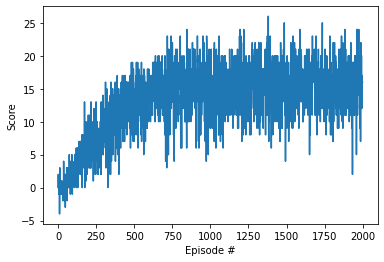

In [4]:
base64_data="iVBORw0KGgoAAAANSUhEUgAAAYAAAAEGCAYAAABsLkJ6AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAA9FUlEQVR4nO2dd5gURfrHv+8mWHLOYUFykOAiCsiJoIKYc4536JnO33l6JpQLnpz59PSUU8SAnjkrmEAEJSxpyXmJSwZZWNhYvz+6e7anp7une6bTTL+f59lnp6u7q96u7qq3wltvkRACDMMwTPjI8FsAhmEYxh9YATAMw4QUVgAMwzAhhRUAwzBMSGEFwDAME1Ky/BbADs2aNRN5eXl+i8EwDJNSLFy4cK8Qork2PKUUQF5eHgoKCvwWg2EYJqUgos164TwExDAME1JYATAMw4QUVgAMwzAhhRUAwzBMSGEFwDAME1JYATAMw4QUVgAMwzAhhRUAwzCW2Hu4DNOW7/RbDMZBWAEwDGOJ61+bj1veWoiSYxV+i8I4BCsAhmEssWVfKQCgutpnQRjHYAXAMAwTUlgBMAzDhBTXFQARtSeiGUS0kohWENEf5PAJRLSdiJbIf2e5LQvDMMkjwPuIpwteeAOtBHC3EGIREdUHsJCIvpXPPSOEeNIDGRiGSRIi8lsExmFc7wEIIYqFEIvk3yUAVgFo63a6DMMEi0+XbMfQiT+gujpYPYgZq3cj/+/f4lhFld+ieI6ncwBElAdgAIB5ctDtRFRIRJOJqLHBPeOIqICICvbs2eOVqAzDOMy9HxRi+8GjKKsMlhnRo1+twt7D5diyv9RvUTzHMwVARPUAfAjgLiHEIQD/AXAcgP4AigE8pXefEGKSECJfCJHfvHnMhjYMw6QIQR9BCrh4ruCJAiCibEiV/1QhxEcAIITYJYSoEkJUA/gvgBO9kIVhGH/hSeTg4IUVEAF4FcAqIcTTqvDWqssuALDcbVkYhvEPCmgbW4jwKiQvrICGArgGwDIiWiKHPQDgCiLqD0AAKAJwsweyMAyTJMnWl0Gtb4M+ROUGrisAIcRs6A+vfeV22gyjULT3CBrXzUHD3Gy/RXGMA0fKcbisEu2b1AEAbNhzGC0b1Ea9Wl606+yTbAW7cc9hNKtfCw1qO/sO3dRHW/aVon7tLDSum2Pp+q37S1G3Vhb2HS5Du8Z1kJuT6aJ03vQAGMZ3Tn1yJvKa1sHMe0b4LYpjDPvnDzhSXoWiiWMBACOf+hEndGyMD38/xNV0k63IE61wT3vqR/RoVR/T7hqenACGON8FGP7EDDTMzcbSR86wdP0pj8+I/B7ZowVevX6Q4zKpYVcQTGgo2pdeZn5HymPt1hduPuB6uokO4ThRva7eWeJALBpcHpL69Whi3lPnbtznsCSxsAJgGMZTgjrpGsY5AFYADMPYItHqW3ElEbTqP2jyeAkrAIZhLKG0kJNtwQe0AxBQI1V3YQXAMIwtkq6/A6YAgjok5QWsAJhAsmnvEUz4bEXEcdiHC7fhk8XbTe9ZueMQHvtqVVIFes3OEtw2dRF+LY2euHtvwVZ8UbgDAFBZVY0HP16G7QePWo73h9W7MGXOpoTl0nK4rLJGtoKtjsVrxLYDpTgo58mKHYfwz2mrXak4v1/lXD7tPVyGP39QGHHy9t3KXXjjlyLD6428nT73/Tos3LzfUppHyipx7wdLE5749RpWAEwgufnNAkz5uQjrdh8GANz9/lLc9e4S03sufulnvDxrI44m4dXxhRnr8eWyYszdFG2Bce+Hhbj97cUAgAVFBzB13hbc/Z65PGpunFKACZ+vTFguLa/Nrqkk7/2g0LF4jfjje0sjv6+bPB//mbkBFVWJKQAzVxA3ve5cPj321Wq8W7AVXxQWAwB++0YBHv50he14nv52LS76zy+Wrn1z7ma8V7ANL85cbzsdP2AFwASSRBqX5bKXyYwkzDmU1qJZ+lmZUvyJVoApic6j2s1m5XKvRlys+hxyUpxUG01iBcAEkkTq8EpH/cwbx5WdKRWbyir/3BpnZERnkOvj2A7OkAa1jnTiEVPN0R0rACbQeF2grCieLLnyLQ9TD8AJHLIisku89NwQJ6iO77SwAmACid8FyKxSCEQPgLQ9AHfT03sbiabpVfVv9xtyYiEYDwExjINoC9RRHfcH8e4xo7S8Muo4XqVRWVUdmQMwGnISQsTE6zSJVFbV1SIyx1Gl+g1Icx+VVdU4VlGFKp3nSnQXr6PlVZEWuNkcgDZdt/NPjZ1eppKH8eQrq6wy3frSKJ/14nGzocEKgAkkRhVcz4enYdehY6b3Wi3Q36zYiV4PT8fSrQdj0jWK4ZKXf4lUZOUGleLUeVvQ6+Hp2OriFoOaKQDM2xTfTPGf01ejx/hpOFpehVunLkSP8dMi53qMn4YbpixAj/HTMO6Ngph7l6jySCFePm87UIqeD0/DW/O2xL2vx/hpuOWthZHjXg9Pj/Jr5MWwkZUew+PT16DH+Gno9fB0zFprvEXta3OK8MhnxhZHPcZPw61TF0aF6T1j94em4ZpX58eVK1FYATCBRq/cbztg3f7ejJ/W7QUALN12MBJWs9pV/57FWw7qn1AxbflOANJaBrfQVlYFRfEVwIcLtwGQ1hBMX7Er5rySH9+v3h0VbtRSjVcnb5ad730lm2FSHO367cpomRZvUSsA87TMiHernbjVay5+ieOs7d0F5usztO/ASI546SQDKwAm7bBbWehdb9a6jRe9F07FtGm4mWZFgkMQyjxFtSaDE6nLE7nHtpmqhevVrXSns9yP6QNWAEygcdMKSK/AWxkGCMJEn3bVqtEqVs1dAOznaXnCCkD6r+RXvN6VGW4OAdmJWn2pXpYnI6cfLilYATCBxFqFpo8TxchKWYxrXuiAHEZo5wCsEMlSm4JVGMx1xMsjZa1CVUwPwJoA6m8gADoXgLvKn3sADKPBi9Zi1PWWKlb/qyMvjWQTXfGsKKmYIaCE3mlCIsg3J3GvNqqoIaDUsPU3gxUAE0iUovXanCKs26W/C9QHC7fhu5W7TK0xtFz60i9Ys7ME05bvjKQx4fOVGP/JcqzY8SvUjeTCbQfx07rYuNWVUdHeI/iysBgb9hzG18ukyU5lMvVgaTmmzttsSyEJIfDmL0UoOVaBTxZvj3E4V1lVjcmzN8WYoFobv5b+l6gcya3fXYLpK3Ya3rN1fyk+XLRNP744NStF5gAkuRVnclZz47U5myKmqotUE8I7f421Ant73hYUFO3HKz9txKdLJKeBSpYcKa+McjD369EKvDlX/70Ubjto+XtS5/nsdXuxoGg/XptTpLqg5qfWuaAefgwt8p7ATCBRCteHi7bpVkAHS8vxp/drHJQp++IC5hXM/KL9OPPZWQCA607uGAl/c+5mvDl3M87p10aKQwic++85MXGrEQDOeGZW1Bi5+to/vb8UFVUC/do1MpEomnmb9mP8pyswb9N+fFFYjLaNcjHnvtMi599fuA1//WIlmtevZTlOhb2HywAAE1TmiaOenmV6z3kvzMH+I+W65+JVWJnKBjBC4K25m1X3Wavpth04in//sB5/OrM7Lp80NxJ+7eR5+Ob/fhM5XrurBA98vCxa7v5tI78f/XJVlMJ84ONl+LKwGL1a18cJHZtEPY+Vd67H1a/OM32Wez5YiknX5pte44cbCe4BMCmJn47Y1CmbTZAqMpZVWvdOqrR49x2WKl3tmoeSY1JL8vAxewvY1By00BpVMKr8raBYAVVVC5So5LXT0j10LFbWXYfKoo6N1mMoaHtL++W8PVZRLcuT2CywnQGgA6WJ56ObsAJgAkkyZo3JdKXtJOtGl12pNOO1BrWTwHbyy6mWZrxYMuTaJRkffYl+BmaVupE1kpV8ibrCRqZbMyqwHJ1jsAJgUhJtYY1adm+xIJlZGpkVRifWGRhBkYlT87iScXntVEUTr+WcoRoCUl+ZqNml1XSVNIyyqGY9mjBMwzhe/w0AnMR1BUBE7YloBhGtJKIVRPQHObwJEX1LROvk/43dloVJHeIOaWjKYUW1M/5SLE2mujhWq640zYhZCOaWQEmgHgJS48VYt1kKRt+WpVZ6VDzOyOMnXvQAKgHcLYToBeAkALcRUS8A9wH4XgjRFcD38jHDWEJboNRzAk5UMNaGA5wv1kqlEm/YJHYhmOOixCXuEJDKDFRduSbbiNbebndBlnYIyLy3l7wJq1XS0gpICFEMoFj+XUJEqwC0BXAegFPly14HMBPAn92Wh/GHwm0Hce6/52DWPSPweeEOPDF9DcYe3xovXDkQj09bjc8Ld+Cne0/D2Od+Qv/2jUwrtJJjFRj8j5+jwtSLlcZ/ugLrdx9GnZxMdGxaB09f2t+ynEdkE8n/e3ep4TVKQdVORhpx8Us12wnO27gPV74yD1XVAk9f2g9/fG8piIBNj8lWJzq2809/uxbPfb8uKk7tnrPqVu1d/1uMHQeP4b1bTsbIp2Ziw54jKHhoVOT8ih2HLMkdj9nr9uLWqYvw5CX9oiyyAOCDW05Gw9xsAMCGPUfwzHdrI+cEgCemr8Yni3dEWTjp8cYvm2Mm/EuOVUpeRiHQ6+HpuvcJAO8V6Juvqq/Ju+/LqGOFbg99jQfG9MC1J+dp7qm56l/fr8PJxzXFSZ2b6savnZz+YfUu3Dgl1tEeNHIoHFF5vl1QtB+D8prEXJMsns4BEFEegAEA5gFoKSsHANgJoKXBPeOIqICICvbssW7vzQSL9+XCOHPtbjwxfQ0A4EvZSdiLMzdg637J3n3FjkOYqvEeqWXDnlgna+rVpp8v3YFVxYewcPMBfLTIfCN5LRstOHBLpqX21bLiyJCIss+uOr4Mle28grbyj8cnS3ZgvuwcTsmrZdt+TVRkQ176cQMAxFT+gOQR1SibhBB4YcaGmDUORrwzP/Z7KP71KHaY3K9dfKaGLAyzlVdW6+5NrB0+ev3nIsM41Agh8OKMDZau1WNVsTNKW4tnCoCI6gH4EMBdQoiopxHSm9B9G0KISUKIfCFEfvPmzT2QlAkCdkc0nOo+W/HR7iY1PvPtyRFvCCgzEd8RcYhnfmn0CE7kcLw4zLLPyCOGXp7HG25ydhtSY5KZ9DeN15VYNRBRNqTKf6oQ4iM5eBcRtZbPtwaw2+h+homHU9YZZRXxJ5NdnQTO0J84TRY3FIDiJdRu1E68KqGZV7CDHZ9I2u9KWxFbfU/JPrIb7w/wxgqIALwKYJUQ4mnVqc8AXCf/vg7Ap27LwvhHxOTOakmw2eJxqro8ZmPRViLEc3KnnQS2nl3m8bqjACTpsjL0qxFjRenAJH2cKKz1AOzL4VcPINOlHoAXriCGArgGwDIiWiKHPQBgIoD3iOgmAJsBXOqBLEyKYPa567X2zcZ8DdPQSUS9TaJx+raTsoyV8elEyHKxB5CdSbCwU2cER3oAiPONWLHiilkIpp+OGm2aVRbNj4UARDKvwCUrLy+sgGbDWPyRbqfPWKOiqhoLNx9AtRA4uXNTEBGqqgXmb9qP7ExCn7YNUTs7E9XVAnM37cOQ45pZinfJ1oM4UFqOt+WJXa0bgtumLrItq97k4XaHdgnT2/tW8aGjYGX7RSOMtrPcfvAo2jbKVS0Ek6oeq0MMG/YcjglTu3GY68KuUsWyU7YjOrX/xr1HMHONvtGG2hndzxv24qRO+lY0Zpgt9AKAQpNJ7xmyXIfL4u87rFYSW/aVRoboFJZvtzY5u2ZnCVo0iPXf9POGvSjaa2HrUJcaHewMjgEAPPXN2ohVx0tXn4DRfVrhxRnr8dS3kvnepfnt8PjF/fDq7E149KtVmHx9Pk7roWu4FaG0vBLnvzAnKkxtDggAXy4rhh5mhTvK46KM2tRSy/Lt1i1gWjeojR0ab5NnPBPtMO1vX8Rah1jl6+X6njeHTvwBRRPHWl4HoOVtHcups5/7KfL7yW/Wxpx3k6VbD0bttaxm3Bs1e+Fe+d95mHBOL9vxizh9ALXzOCOULSsjccbJ8+FPzEDjOtlRYVpzXCOOVlTFpAdIz28Ft+ad2BUEAwBRLpcV8zp1q3JVsXR+414prFjHJa+WeFYiXrHPhkOzxnVzpP+qgm7HIVqyQzdG2ygmglaRBQVtj6pIp2KMhxPDSLnZmfHTCcgaXreGHVkBMIZE78gU/QW6vRmGFwtb9Z6hUp7YTHRuL9k5wWS2TQwTTijI2F6mjhlomr8HVgCMIeryYWXZfDpQKU/qJVrBONUD8Hs9QtBx4jtMZttRr3Hra2AFwBhjUj7cLjt+FU6l4q1OsAJ2qt52ooXLmJOInx+/vkseAmI8Q/nW9IZIlA/RSjGw7zbZ/0pPsevWbmRulWQrbh4CsoYT+WPlXQXlPfAkMOMZf/tiZYw9/Iodh7Boy4HIh0gEPPXNmsj+q4eOVeD61+bjhtfm4+f1exNK96gqzUqTnbbsUmhgjTJZtU+swjbZnPSYhRXBeiRTYXxRuAPTV+wCoG/q6iV5932p66AsKJzz79lYYvBerfK/+Vujjh/7enXMNT9a2B/45jf1HbylAmwGygCIHdIpKDoQE3bjlAU4vWeN6efzP6wHIO2/+sni7RG77xlr9qBo4ljbbZYfVXbjSx10XqaYsnpBMi21299e7KAk6c89HxQmdb/W8d8Pq2O90dzy1sKYMC2K0nYTHgJiPKVaCJ1VjzVfoXZ4SG9IyO6QTjrMe6bDM3hNCs3F+rbxDk8CM55SLURMwayutte+tfvRJjruHiR48pZxBZe+K1YADAAdvyg631uU4ysLTSG7lWEQJoGTRQRj7RvDWIIVAKOLNAQUXcsLYbMhYtsKyN71QSQoK0eZ9MKtr4ongdOMiqpqHCmrRKM6OZEwIQT2HSlHdkYGsjIJldUisl0fILlsWKnZcahaAKUaS6Dyqmr8elRyi3Aojg+UX49WYPN+e0v89XylpBqHjsZ3MMZEY+QgL4hYcSDnBiXH3EmXUqnbnZ+fLwoKUtfkygvufGcxPlu6A0UTx0bC3pm/Bfd/tCzqOvX5056aiY2abRZfvuYE3PxmfAsIAJhywyBsPXAU4z9ZnoTkDMOYoS6zdiGihUKIfG04DwGlGZ8t3RETNnuduV2+tvIH7I3HL936q2/WEQzDJA4rgDRFXYEnMi5tx5zRpd3qGIZxGVYAaYq6AZ/IKJ8dC55UsuNmGKYGVgBpirr6TkQB2PFGmUpeFRmGqYEVQJqS7BCQHaVBxL0AhklFWAEEnPLKavzru3Uxztlmrd2DWSpHVZv3HcGbczdHjpX6e09Jma6vkgF//Qb/+GoVnjbwk1NqY5fvqXO3RJyoMQzjDqt3Wtt/2A68DiDgTJ23Gc98txYCAneN6hYJv3byfAA1pmEXv/QL9pTUbLWntODPeX62brwHSiswadZGw3Rnr4/vBVFh+8Gj+M/MDZavZxjGPgeOWNt/2A7cAwg4ilvioxXmLfKDpdH71irDPvuOlOldHpfyytRZH8IwZnx++zC/RXCEk49r6nicrABSBY/dKqTSAkGGMSM7iyeojGAFEHASnVyt2bkrsQi4+mfShZxMruaMcD1niGgyEe0mouWqsAlEtJ2Ilsh/Z7ktR6pjt0KOWP4kqEDYrTGTLmSzAjDEi5yZAmC0TvgzQoj+8t9XHsiRksSrv5XNy43cOSfa+bWzDoBhgkytLFYARrieM0KIWQD2u51OujNp1kZdS5vOD3yFLwuLY8J7PzId05bvRFllYg7qf4rjP4hhUoVaWZl+ixBY/FSNtxNRoTxE1NjoIiIaR0QFRFSwZ49108R05BkDm/2PFm3TDX9LtS6AYcJKrWzuARjhV878B8BxAPoDKAbwlNGFQohJQoh8IUR+8+bNPRIvOCSzwjZsq3P7tW/ktwiBp2uLen6L4DkZYSsINvBFAQghdgkhqoQQ1QD+C+BEP+RIJ3jEnr2SWiGMlWEIH9kyvigAImqtOrwAAO8kwiQNl/P4hLEyDKPSs4rrriCI6B0ApwJoRkTbADwC4FQi6g+p4VoE4Ga35UhnuPUvwQU9PmH03Bq+J7aO6wpACHGFTvCrbqeb6mzZV4qSMo3vD/lL3nc42r3DD6t368YRNkueENZttgljFvF3YQw7gwsow5+YAQB48KyeMecumzTXa3FSggVFB/wWIfBkhNAgJoy9HquE8HNIYeSxnvW7D/srB5Oy2HUN8rtTOrkkCWPGFSd28CQdVgABhxsvjJPYtZTieRV/8MqijRVAKsFlkUkS28Mh/M2lNawAGMYimWmw0IAb9KmBV5Z9rAAYxiJZaaAA7A7p8BCQP3jljJcVgIPsOnQMo5+dheJfY/fHfXHmevz185VRYa/8tBHjP4leA/f9ql246hVjKx8jvz+M+9TOTn2nYnarc67+/aHaI2+8rAAc5N0FW7F6Zwmmzt0Sc+7xaWswec6mqLC/f7kqaiN3APjdGwWYs36fbvwE4I/vLXVMXq949II+jsXlRiN80jUnRB23aVhb97qRPVo4n7jH+DmM9e64k5KO46WrB2LihX0dkCbYVHnUBWAFkEKkyorfOjnRLeUmdXIci/vBsb0Mz9XNSayFfkbvVlHHgzvH7r06KK8x6tdO/WUzOTZ94zs5AqSXr3bp264RLvfIRNKMerXc/Ra82o/D8tdARLlE1N1NYdIFJwtNKi5icbPxYtaAdTuvUvFdaLG7PWKiW4q6RVCkcVuOQCkAIjoHwBIA0+Tj/kT0mYtyhZZ0qGSEi30VnpRMDrs9gKARlPfvthiBUgAAJkBy2XwQAIQQSwDwEkED3GoBB+PTj4+bPYCAlP+Uxe7+uEEzfArK+3e7oeaVArA6kFUhhPhV89CpMiTtGVY/iZJjFZa3ajxwpDxxgXzCXQXgXw0QlMonGWxvkB6whzaSJoMAL7exdjtbKgPWA1hBRFcCyCSirkT0PICfXZQrrRnx5Ezk//07S9f+e8b6yO9E9/f1mmqNBnDyU050ojcegzs1MT2fDiagAHBiJ8PdV1MDg4r3rL6t9U94K4ZjNK9fK+rYLQs0qwrgDgC9AZQBeBvArwDuckWiNCDeGPjew6nXqreD2dPP/vOImLA7TutiKd55D4xEnRzjTqtQKZ4TOzVBwUOjLMULAK/faL4pXe3szMBNiCbC+QPa2rre6Im96hjMf2Bk1LHeJPbk6/Px9KX9E05jyg2D8PUfTtE9d9eorrrhRITuLetHhXVuVtc0nRl/OtWyTGpT5NG9W+HFqwdavtcOcRUAEWUC+FII8aAQYpD895AQ4pgrEqUwAest+4bQ9ADU2dKucZ2Y65vVqxUTpkfLBvr2+XrUysqwHC9grYXv9/tt2cD68xhhdxLV6PJM1YlaDk8sq9cqNK9fC7mqd6M3hNWoTk5Sk9v1a2ejZ+sGuueM8iuDgDq1or+ZZvXN30/HJnXQ2mCNiRZ1CWpWPwe1stzpgcbNNSFEFYBqImroigRMFOmgQ9J1cigd3o1TriDcXFCmjlk756OnALQNDtvpmTyKcdRke86ByPr8mFeuIKxOAh8GsIyIvgVwRAkUQtzpilRMSuPux2sceTqY0JrhxBCU3Xrb6HK1AnA627XxqY+zM2MTc/N7MxrOlSpzewkTkWUTae08mltYVQAfyX+MBbzS3kw0ybYE45EO+sUpJeluD4BgpOj15PejuElWR/ZTttwDsB1zYlhSAEKI14koB0A3OWiNEKLC7B4G2Lq/FB8v3o4mdZ1zhcAYoy40rISdwXAOQKUAjlU4bJ2m7QHEudzVHoBB3ARCVQKPbXnYKEi+gIjoVADrALwA4EUAa4louHtipTZKoblxygI8/e1aPKTx+GmGV/a/iZCboCnkKd2aRx13aBI9ETyyZ3Imbg1zswEAD+jsnxyPy/LbW7ruz6O7J9x6vvk3neNek9+xxjyzf/tGGNWzJf51ef9I2OMXHY/nrxwQdU+/dg0x5LjE/es8ZsGpmvqZG9XJjvzOTDAvrEwYa2OedG2+4bWDOzXB8e2k6cmrBndAL9Vk7hMXH4+rBkt+g/5vVLeo+y4+oZ1hegrn9mtj2BIngq5Tupc1jgX7tW8EQPIlpUbPr9QJqm/g6pM6GqTsLFanzp8CcIYQ4jdCiOEAzgTwjHtipQdHK6r8FsFR7j+rh63r/3Z+HxRNHBvjOOuv5/WOOm7XuA6KJo5Fj1bRZnV66DWMlPjV91sda/3nxcfHvaZB7Sx0aRFfNiPGWrBR/+D3QyK/P7ltKF65Lh/n9a8x2bx0UHsMymuCmSpTwqsGd8Sr1w3Sjc+Kzx+jfWf1vHbeMDQPb900OHKckeAQ0M3D4ytDLUO7NDM89+7NJ0csuB69oC8uya+p2C/Jb49HL5Aq6T+M6oq599eYlD55Sb9I5WzEc1cMMGyJZxChX/tGMUrgTI1jwU9vG4qiiWPx/i3K+5Xi++S2oZFr/nJubxRNHItuslnpoxf0QQsbFm/JYFUBZAsh1igHQoi1ALJNrg81PPwgYVRHGK1GtdLC1staZezfrTF6Ra4gTgG48czq96D81H7TQXMRkRA+FFSlg59oD8pprE4CFxDRKwDeko+vAlDgjkipS7pbodgtL0YmhEY7ayWae4pY6vx3smxHxE2h1+uUQz4jy6OgLopLRCqzcms2BJQIeo2VGuMF7xWS1R7A7wGsBHCn/LdSDosLEU0mot1EtFwV1oSIviWidfL/FF+fzuhh1ErMMuwBJJaOUn7c8hSZEekB+F/paasId3oA9sJTBa38Vqpbo4aE2bdmZiGlRBcUr6ZWFUAWgH8JIS4UQlwI4DkAVmcEpwAYrQm7D8D3QoiuAL6Xj5mAk4jdsx6GPYAEy4RijpfpUg8gIGVVF7eVkvpVqdMKcp4YYejWwuQes3UA6v9qzPaOVr5LO/nn6v4aFq/7HkCu6jgXgCVvZkKIWQD2a4LPA/C6/Pt1AOdblCMleHHmBlz1ylxsOxC7N/DoZ2fFhOXd9yUAxGwPGTSsumLo01ayxGihWhpfO7vmU1Nbk6jp1jKxidYesuVHrWx77gC01khGKIqsbePcOFfaxwn3DnrEqzTMTJMVqyrAXkVVv1aWaeUH2BvkiOdbxy5adwpdWtQDANSTLXK0O9kBQJtG+u+8b1tjxwj92jUyPNeztfSNm03Se9nTtDoHUFsIcVg5EEIcJiJrpUeflkKIYvn3TgAtjS4konEAxgFAhw7+bwVnFaN9fVfvLDG853/zY/cSdpvJ1+fjxinWpnNG92kV95rJ1+djeNfm+GndXpzavca888d7RmDXIcl9VMemdTH1t4PRuE4OcrJqPvY/j+6BjxZtN41fr2J74coBWLHjUJRiUVpur10/CB8u2oYvCotRNycTL1w1EJ2a1cXew+XIa2pRAcj/rzqxA8bbMOk1k1nhiztOwbYDpQCAn+4dgcNllbbiNqugv7hjGKqqBc57YU5U+Ce3DUWbRsbK3EgRU1RvIJpPbxuK1g1rY3dJGQ6WVuDqV+fFEz2Kt387GFe+Mi+Szoe/H2L6fl4xMQ01oqGm4fHo+X1x4YB2OK65pAhm/ulU7Dx0DOf+uya/rhjUAXPW78VXy3ZG3Tvh3GhLNjX/vS4f/f7yje65l6/Jx+riQ6jr8paSVrEqxREiGiiEWAQARJQPILZ5mwBCCEFEhkVECDEJwCQAyM/PT2v7GqOxcTcZ0N769IuVSe7Teki6fITGfW3LBrWjehB6pn3qlqcRel3y+rWzcVLnpthTUhZzbkSPFqhXOwtfFBajZ+sGEaXUsan11qXy2ImaPprRvH6tiOvf9hZ7JBHIfPiiT9uG2H0o1mdjfxPzx+GaNRvKWLUQIpIPbRvlxgwHKiaViZovDlF9D0JE28TrMaqXYZvRMrk5mRjWtSbdFg1qx8ifkUEY0b1FjAIwczRo9h03zM3G4M5NUVpuT9G7hVUFcBeA94loh3zcGsBlSaS7i4haCyGKiag1gN1JxJU2ZPtgWxckjZrsuHK0ZUXs+USfNdkJO9fGy4WxUk70WXVc7UQIwiR40Eg0T9T3+VkGTZucRDSIiFoJIRYA6AHgXQAVkPYG3pREup8BuE7+fR2AT5OIK23IMit9IcCtCkaJNVFfQckqAFd3SEv6guCRTHansim2H+uH4o05vAxA2b3kZAAPQHIHcQDysEw8iOgdAL8A6E5E24joJgATAZxOROsAjJKPQ09WhvdDQG47UPMSddFXP1VkMZOXwniBB3Wd3qKwsOHGdxOUvIw3BJQphFAseC4DMEkI8SGAD4loiZUEhBBXGJwaaRAeSuas3xuZJA0ryQ8BmRv6JarrglJY9XBv9XNsflHU+QBnSgqg9iTqZxssXpMzk4gUJTESwA+qc8GYxk4TrnplHtbtPhz/QoepXzu1PHpoC4van01UlaS6LtkeQLy67rYRxwEA7h3dPcEUjOnbtiFGdK+ZmFWbjZ7UqanxHIDFWmVol6Y4oWNjtG8Sbe54/xjJ71PUOoCIWwj7OalnYjlGtipTTIT/IlvWTDgn1sKmdcPauETlwC0onKxyxnfj0LzI7zYNa+OigcbympqBeqhb41Xi7wD4kYj2QrL6+QkAiKgLpH2BmRRgdO9WmLaixorh4hPa4YOF2wAAOVkZuHFoJ0yeY29Kp3/7Rliy9WDk+OVrTohxhGUXK9+9uupZ+dczTfcIthOv+f3mMdw4tBPuOVOqMG89tUtkXYcTfH7HsKjjOjlZKJo41vD67+/+DUY+9aPl+Kf+VnL89sPqXVHmwOOGH4dxw4/DFPm7EFBZBCF+nhZNHBvJBz15/3h6N1wwoC2+Xr4TTetKSu26IXm4bkiebny/3B/MAYP2TeroPt/PceTNyszA9UPyMOXnIsNr/nZ+H4z/ZLmrQ5empUcI8SgRfQ/J6ucbUaP6MyBtFM+oCGqv2Cm/MGrcdkJm6XpNNRRlBaT3zAlPAid0my84Lar6nSguDqqFSHhiPCWnnHyS2YvPLm7zSQgxVydsrTviMF6g/bASKctBqBNjtg40kErdck0sHfOnDdJ4uPZZnbSsUuKuFsFt7KQyQbQCYhjPSLpOMVgHYOTSOB3Rtsyd6v0JUdMDSCfLMSu40YMOCqwAQkhsyzmROPxpAqorH7siWC3I2goulSo8NzdorxkCcsBiK7nb0wo/vy625HGAMf/6CauKD0U5P0t33CjAZpWKsh1lbZNtKaPnAFThSZqBNqyT3J7ORhvguIFSSTeRZVavLTHb0jMnUzqntQpT8rtOrcxI/iayGXoqY/bNuYG2GLiZ3awAHGBV8SEAwG4dXzRBhEB4/ooB6NpScoKlFOz8jo1RsPlA5LrPbx+GTfuO4M53FkfC7jmzO56YvgZanPhIiUjXMuKige1w+2ldAACn96zxARMzCWwYr305FPq1a4hJmn1e7dKzdX38pltzFO07gs37SnHXqK549rt1ScWpx9/O6402jXLx+EXH46TOknlik7o5ePSCPth/uBxn92tjeO/QLk3xwFk9cNmgaIeLFw5oi72Hy3DDkE4R/zVC1OT9vaO749Ruye3p7AZG3k7f/t3guN/ql3cOw+Z9pZHjs49vg017j6CqWuD5H9Y7KWYU2h6qF51sHgJKE6zsO6tABJzTrw16tGogH0tf2ukaB1t92zXEuZpKQ9l0262P81KdTdovGtgWnWTXwGqHbDFDWVH7AcSW8kSU1Ke3D7PsBtsIIsLrN54YMZM1a4knwzUn5wGQ9g/uoPKkedXgjrhjZNdIHhrJOG74cTGOzLIyM3DrqV2Qm5NZMwRULSKV1di+rdGrTYOY+IzwajzdqDwMOa6Z6R7DANC7TUOcpbo/M4Nw16huuPsMZ9d5xCtDXnS0WAGkCU5UyHa+NzMTTKcx3JbP4v1BcQWRSnMJemSozECDSs27Dq6MRhhuv+li2WIFkCRBKdR27LKTmQSOFCzNTU5lg52PXTsRbegLKDIHEIx3laomlMqOa9XCuLKKB3sUNcYPpcUKIEmqg1GnmGK13gtI/RiDkVxOrGdgrJOp0wOw+83oVXL83szhSeAAsqekDPuOlGH/4fL4FweO5O1AvSyz8fZljRyrfawHcB2A3+knizofudJ2DqOeKU8CB5hBj36H0c/+FNnGLshoP6QhKgdWagQEzj5emvwyclaVJ++kdZpmx6/jmju7f6uT2C1Iw0wmCS8c2Dbu/ecYWNsMli1zzPaMTRTtBL4bKCalFwyoyQMznZYdZ38LZYvGscdbN2AIAmaO3OwQb8y/dxtp32Gj8uoE3AMIAUIA6x4dg12HjqFerSw00ti1qz/EZy/rj0fO6Y36tfU/jc7N62HJw6ejVlYmHvt6NXIyMzD/wZExcTotvx4xcwDx1gFYHGO96IR2uPv9pbrnHr/oeExbvhOl5VWG9z9zaT/844I+6Dshel/Y03u1xJKHT3c8r5ZNOMMTW/XMDELhhDNQJzsTo56O73Bu2YQzDc8RAQ1qZ2PpI2egfkD2x7XC6r+N9iyt/u0bufK9qEmdnA8pXVrUw3oLbqLjVW3ZmRlo19h8z1khJLO/5nEWtDWqk4NjFVVRx0GmZgFT8nFlZWagfu0sUwWQlZmB+gatRDfyykuX3g00aZlNrFtRSlb2gQ4SXi8Kc7ts8RBQwMn0YCAw6OO5VuvtqOdQu4xwVJpYgmJd5CVBcoCnJphSWYOdwTExZKSSL2KXcKqCDWNF7TZ2c5RfQbBgBRBwrM43JVO5pYuKMZ4rkM97J0raky7fTNjhOQAbrNlZggc+XobFWw7Ev9ghvBgCUrCjRLwcAUik4tZ4VUk8IoZxCaMy5OViOVYANrh80i84UFrhaZpPXdrfksWFEWf2bonxZ/cyveZ3p3TGxj1HcM1JebrnX7hyIIr2HUlYhqSxWHHXysrAFSd2wNyN+/D0pf0i4Z2a1cXFJ7TDTcM6md7/n6sGRibc/3FBX1QZ2WdbLKD3ju6O9gYT789c1g97S1JxDYnEi1cPxH9nbYqYBTPJ40f7hBWADSqrvH9FnU0ceOkxbnhnTJq1MXL88jX5ce9pXDcHL5l4vEwVO20iwmMX9o0Jz8wgPHlJP507ohmjcgB25eAOJlda49ZTuxieu2BA8DY4t0OPVg3w1KXx85QJNjwHYAM/NLTVoRZFtqw0nDRORcdejDluWxGl0mSzIqsfJdfXHgARFQEoAVAFoFIIEb+56iN+WJHYLShebj7iBgG1LowiFWQMOq6VpRR+OWEdAhohhNjrtxBWSIVGRbzl96lIKrXmGCaVSO3mogsIIVBWKa3yrKiqRpW8fPRYRZXp6s+gkJXiPQA9gqYA0k/Fek9QF5J5iZIDfg5x+l1bCADfENFCIhrnsywAgIlfr0b3h6ahrLIKXR/8Glf+dy4AoMf4aT5LFgf5G6rnkV8VZf+BgR0buZ5WPNcUftGjVX0AQE6W38WIUWjXKBeA5LMq1ejSQpK5daPkdqCzg99DQMOEENuJqAWAb4lotRBilvoCWTGMA4AOHZK3zIjHO/O3AACOlVcDAOZt2u96mnp8fOsQHDwa3+T0zpFdcW6/Nnjm27UAgEZ1svHRrUNw4Ys/uypfdmYGvrhjGPJsWinZ5YmLj0e/9o1cTSNRnr9iAI5VVHvqi4cxZ0SPFnjv5pOR37Gx36LYZtwpnXFCx8YYlNfEszR9VQBCiO3y/91E9DGAEwHM0lwzCcAkAMjPz3e9rxSUbe8GdLD2ATerlxNpOSj0bdvQDZFi6ONyOo3qZOMSnT2C/UYZvsjNyUTXlvV9lia18KJUndjJuwo0GbSjYBkZ5GnlD/g4BEREdYmovvIbwBkAlvslj4LyTqJ3PQrYIHQc0mV0NcWynWFSDj97AC0BfCy3prIAvC2E8H2gXWndqeueIFdEQZhIcougK96Ai8cwcfFNAQghNgII3FJCZR1VVA/AJ1kSgTfdZpjUws+GRKjNF95bsBUHS6P9sSg9gLkbayZ/S8srPZXLFjrmdOliYpdKipdhUpHQKoDVOw/h3g8L8cf3orf+U3oAd76zOBI27J8zvBTNFiO6NwcA3DBUcnQ2qFPqWT+o6dDEfNcyALjnzO5o1zjXA2n0uW9MD+RY2DmNiUXZT3hMn1Y+S8IAIVYAZRWSmeeekrKo8Ayd1vOvFswxraJ17taqQeI2v1cO7hDZ5nFQXhMUTRyLFvVrp/QgUJ2cLCx95AzpwKALcNuILpj959O8E0rDOf3aYO2jYzzfHjAd6NayPoomjk1JO/10JLQKwNgXN+M3aTKCxTCBJ7QKQEFrPZMO4+dp8AgAeA6ASW+CUNeEVgEYWctkpFCO+P/5uEO6PhfDBI0Uqu7cQWuCpTcH4Cge1G5BaFk4QdDXATCME/j5lfvtC8hTTntqJsb2bY27z+geNUxSVlmF7g/5vgaNkcmUTbFaNfTOKRbDeE0Qmmmh6gFs3HMEz/+wPipMCGDvYWf2Zr1/TI+YsL+c2xuX5rdD20a5eOSc2L151YrozpFddeN95dp8vHfzyY7ImArUycnCc1cMwNu/O8lvURgmrQlVD8AIp4YazujdCo99vToq7LoheVHHb83dbHj/H0/vhue+XxcTPqpXS1RUVceEp8lIjy7n9mvjtwgMk/aEqgegh4BzS7EzXayR07iuZ5hQw64gfECpq52caHSzRZ4uE7sMwwSH8CoAVZvasR5ARvxKOtGKnKt/hmGcJhRzAEfLq7BmV4nuudU7S7Cy+JAj6bhpQqoXNXv+ZJgUJgDFNxQ9gHs/LMT5L8wxPH/LWwsTire/ZqtCbQegSd0cw3sH5UlO2649OS/GP5Ae6p7DsC7NAACnyo7gjLjixODtpsUwjMQpXaTye6KPDhxD0QNYuvVgTJgTG6h89PshOFpRhd6PTAdQs52kwoIHR8Xco1zx9/P7ol3jXNTJycS44Z0jcxFr/j46bsv+zZtORHlVNWplGTsjW/foGFcnpRmGSY5hXZthzd9Hm5ZjtwmFAtDDiXH/jAxC3Vo1WagdAjKbEyBC5N5MAhTVYOVjIKK412VnhqJzxzApjZ+VPxCSISA93DC9sjAH7Gr6DMMwdgivAnDBA4d2CEgPHpVhGCYohFYBVLvSA+DanWGY1CGUcwB5932Js49v7Xi8ViZdM2V/0270QBiGYewQSgUAAF8UFjsep7r+f/rSfrrXvHT1QLz5y2Z0a1Hf8fQZhmHsEFoF4AbqIaALB7bTvaZj07p46OxYr6AMwzBeE9o5ADew4gqCYRgmKPiqAIhoNBGtIaL1RHSfn7I4Adf/DMOkEr4pACLKBPACgDEAegG4gohSemyEPXYyDJNK+NkDOBHAeiHERiFEOYD/ATjPR3kYhmFChZ8KoC2ArarjbXKY49TOTu4xu7SoBwD4Tbca52s9WzeI/FYcuyn0aOWehU8vVboMwzDJEHgrICIaB2AcAHTo0CGhOJ65rD/GPjfb0rVTbhiEBz9eju0Hj0bCXrk2H8cqq9C1RX2s3VWC3OxMNK2Xo7rnROwpKQMAzLpnBBrXzU5Iznj8eM+paFqvlitxMwwTPvxUANsBqP0Vt5PDohBCTAIwCQDy8/MTWj3Vu01Dy9f+pltztG+SG6UAMojQo5XU8u6p0wKvWysr4titQ9M6iYhoiY5N47uNZhiGsYqfQ0ALAHQlok5ElAPgcgCf+SgPAGkit1qz/zqv2mUYJh3xrQcghKgkotsBTAeQCWCyEGKFX/KoqdRoAPbcyTBMOuLrHIAQ4isAX/kpgx5VGk9xXP8zDJOO8EpgHao0Tf5q7gIwDJOGsALQ4YExPdGucS5euvoEdGhSB20b5fotEsMwjOOERgH87fw+AICrBndA0cSxptcO6dIMs/98Gkb3aYVZ945A7Wx/t21jGIZxg9AoAJ7JZRiGiSY8CkCG3fUwDMNIhE4BMAzDMBKsABiGYUJKaBQAzwAwDMNEE3hncG7x/i0n49DRCtz0egEA4K2bBvOOXgzDhIrQKoBBeU0AAO2b5GLr/qNo3ySXna0xDBMqQjMEpEAg02OGYZiwEDoFYAQvE2AYJmyEXgHwugCGYcJKaBRAvBY+dwAYhgkboVEARlx3ch4AoJlqi0eGYZgwEForIIUbh3XCjcM6+S0GwzCM54SuB8Bj/gzDMBKhUQCCzXwYhmGiCI0CYBiGYaJhBcAwDBNSQqMAsjKlR83JDM0jMwzDmBIaK6BL8tth6/5S3DGyq9+iMAzDBILQKIBaWZm4/6yefovBMAwTGHg8hGEYJqT4ogCIaAIRbSeiJfLfWX7IwTAME2b8HAJ6RgjxpI/pMwzDhBoeAmIYhgkpfiqA24mokIgmE1FjH+VgGIYJJa4pACL6joiW6/ydB+A/AI4D0B9AMYCnTOIZR0QFRFSwZ88et8RlGIYJHeS3jxwiygPwhRCiT7xr8/PzRUFBgftCMQzDpBFEtFAIka8N98sKqLXq8AIAy/2Qg2EYJsz40gMgojchDf8IAEUAbhZCFFu4bw+AzQkm2wzA3gTvdROWyx4slz2CKhcQXNnSUa6OQojm2kDfh4C8gogK9LpAfsNy2YPlskdQ5QKCK1uY5GIzUIZhmJDCCoBhGCakhEkBTPJbAANYLnuwXPYIqlxAcGULjVyhmQNgGIZhoglTD4BhGIZRwQqAYRgmpIRCARDRaCJaQ0Trieg+D9NtT0QziGglEa0goj/I4YbusInoflnONUR0psvyFRHRMlmGAjmsCRF9S0Tr5P+N5XAioudk2QqJaKBLMnVX5csSIjpERHf5kWeyn6rdRLRcFWY7f4joOvn6dUR0nUtyPUFEq+W0PyaiRnJ4HhEdVeXbS6p7TpDf/3pZdnJBLtvvzenyaiDXuyqZiohoiRzuZX4Z1Q/efWNCiLT+A5AJYAOAzgByACwF0MujtFsDGCj/rg9gLYBeACYA+JPO9b1k+WoB6CTLnemifEUAmmnCHgdwn/z7PgD/lH+fBeBrAATgJADzPHp3OwF09CPPAAwHMBDA8kTzB0ATABvl/43l341dkOsMAFny73+q5MpTX6eJZ74sK8myj3FBLlvvzY3yqieX5vxTAB72Ib+M6gfPvrEw9ABOBLBeCLFRCFEO4H8AzvMiYSFEsRBikfy7BMAqAG1NbjkPwP+EEGVCiE0A1kOS30vOA/C6/Pt1AOerwt8QEnMBNKJolx5uMBLABiGE2epv1/JMCDELwH6d9Ozkz5kAvhVC7BdCHADwLYDRTsslhPhGCFEpH84F0M4sDlm2BkKIuUKqRd5QPYtjcplg9N4cL69mcsmt+EsBvGMWh0v5ZVQ/ePaNhUEBtAWwVXW8DeaVsCuQ5PRuAIB5cpCeO2yvZRUAviGihUQ0Tg5rKWrccuwE0NIn2QDgckQXzCDkmd388SPfboTUUlToRESLiehHIjpFDmsry+KFXHbem9f5dQqAXUKIdaowz/NLUz949o2FQQH4DhHVA/AhgLuEEIdgwx22ywwTQgwEMAbAbUQ0XH1Sbun4YidMRDkAzgXwvhwUlDyL4Gf+GEFEDwKoBDBVDioG0EEIMQDAHwG8TUQNPBQpcO9NwxWIbmR4nl869UMEt7+xMCiA7QDaq47byWGeQETZkF7uVCHERwAghNglhKgSQlQD+C9qhiw8lVUIsV3+vxvAx7Icu5ShHfn/bj9kg6SUFgkhdskyBiLPYD9/PJOPiK4HcDaAq+SKA/IQyz7590JI4+vdZBnUw0SuyJXAe/Myv7IAXAjgXZW8nuaXXv0AD7+xMCiABQC6ElEnuVV5OYDPvEhYHl98FcAqIcTTqnAjd9ifAbiciGoRUScAXSFNPLkhW10iqq/8hjSJuFyWQbEiuA7ApyrZrpUtEU4C8Kuw4ME1CaJaZkHIM1V6dvJnOoAziKixPPxxhhzmKEQ0GsC9AM4VQpSqwpsTUab8uzOk/Nkoy3aIiE6Sv9NrVc/ipFx235uX5XUUgNVCiMjQjpf5ZVQ/wMtvLJlZ7FT5gzR7vhaSNn/Qw3SHQeq+FQJYIv+dBeBNAMvk8M8AtFbd86As5xokaWUQR7bOkCwslgJYoeQLgKYAvgewDsB3AJrI4QTgBVm2ZQDyXZStLoB9ABqqwjzPM0gKqBhABaRx1ZsSyR9IY/Lr5b8bXJJrPaRxYOU7e0m+9iL5/S4BsAjAOap48iFVyBsA/BuyZwCH5bL93pwur3pyyeFTANyiudbL/DKqHzz7xtgVBMMwTEgJwxAQwzAMowMrAIZhmJDCCoBhGCaksAJgGIYJKawAGIZhQgorACYUEFEVRXsZNfUySUS3ENG1DqRbRETNErjvTCL6C0meIb+OfwfD2CfLbwEYxiOOCiH6W71YCPFS/Ktc5RQAM+T/s32WhUlTuAfAhBq5hf44SX7e5xNRFzl8AhH9Sf59J0k+2wuJ6H9yWBMi+kQOm0tEx8vhTYnoG5L8u78CafGOktbVchpLiOhlZcWpRp7LSPJNfyeAZyG5T7iBiDxZvc6EC1YATFjI1QwBXaY696sQoi+k1Z3P6tx7H4ABQojjAdwih/0FwGI57AFI7oEB4BEAs4UQvSH5V+oAAETUE8BlAIbKPZEqAFdpExJCvAvJK+RyWaZlctrnJv7oDKMPDwExYcFsCOgd1f9ndM4XAphKRJ8A+EQOGwbJbQCEED/ILf8GkDYfuVAO/5KIDsjXjwRwAoAFkgsY5KLGyZeWbpA29QCAukLyFc8wjsMKgGGi3e3q+UYZC6liPwfAg0TUN4E0CMDrQoj7TS+StuZsBiCLiFYCaC0PCd0hhPgpgXQZxhAeAmIYaWhG+f+L+gQRZQBoL4SYAeDPABoCqAfgJ8hDOER0KoC9QvLlPgvAlXL4GEhb9AGSc6+LiaiFfK4JEXXUCiKEyAfwJaTdnx6H5AytP1f+jBtwD4AJC7lyS1phmhBCMQVtTESFAMoguaFWkwngLSJqCKkV/5wQ4iARTQAwWb6vFDXue/8C4B0iWgHgZwBbAEAIsZKIHoK0A1sGJM+UtwHQ2+5yIKRJ4FsBPK1znmEcgb2BMqGGiIogudXd67csDOM1PATEMAwTUrgHwDAME1K4B8AwDBNSWAEwDMOEFFYADMMwIYUVAMMwTEhhBcAwDBNS/h/vAp3j5h/MOwAAAABJRU5ErkJggg==%0A"
display.Image(b64decode(base64_data))

The agent was able to receive an average reward (over 100 episodes) of +13 in 416 episodes.

### Double DQN

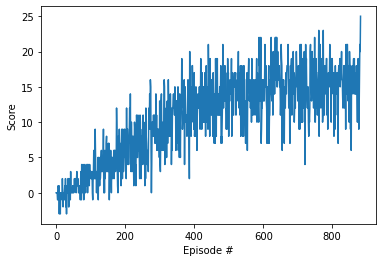

In [4]:
base64_data="iVBORw0KGgoAAAANSUhEUgAAAX4AAAEGCAYAAABiq/5QAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAABN00lEQVR4nO2dd5QcxfW23zuzUWGFsoTSSkIBESSByBY5ZwwmGGdswDZgbPPZMiYasMEmGDA/gnHACRtsjAFhgSSTRJZAAWWBJJRQjittmqnvj+7qqe6uTjPdO7M79zlnz850V1fX9PS8dfvWrVskhADDMAxTPqSK3QCGYRimbWHhZxiGKTNY+BmGYcoMFn6GYZgyg4WfYRimzKgodgPC0KtXL1FfX1/sZjAMw7QrZs2atUkI0du5vV0If319PWbOnFnsZjAMw7QriGilbju7ehiGYcoMFn6GYZgyg4WfYRimzGDhZxiGKTNY+BmGYcqMxISfiAYR0StEtICI5hPR98zttxDRGiKabf6dnlQbGIZhGDdJhnO2AvihEOIDIuoKYBYRTTX33SeEuDvBczMMwzAeJGbxCyHWCSE+MF/vBLAQwICkzscwDNORWLttD+59eTGWb2qIve428fETUT2A8QDeNTddRURziej3RNTd45jLiWgmEc3cuHFjWzSTYRimZFi3vREP/G8ZPt2yO/a6Exd+IuoC4F8ArhVC7ADwMIDhAMYBWAfgHt1xQojHhBAThBATevd2zThmGIbp0GTNRbJSFH/diQo/EVXCEP2/CiGeAQAhxHohREYIkQXwWwCHJtkGhmGY9kg2awh/muJX/iSjegjA7wAsFELcq2zvrxQ7D8BHSbWBYRimvZIxLX5KQPiTjOo5CsCXAcwjotnmtusBXEJE4wAIACsAXJFgGxiGYdolcjn0dAK+nsSEXwgxA4CuxS8mdU6GYZiOQibbTn38DMMwTH5Yg7sJKD8LP8MwTAmSi+ph4WcYhikLslnjf7uK6mEYhmHyJxfVE3/dLPwMwzAliDCFP4moHhZ+hmGYEiRjunrYx88wDFMmZC2LP/66WfgZhik75q3ejm27m633OxpbMGfVtuI1SEM2wZm7LPwMw5QdZ/1mBi5+7B3r/WV/fB/nPPQmWqV/pQSwLH4WfoZhmHhY9NlO6/WHn24DYOSRKRXYx88wDNMGiBJS/tzM3fjrZuFnGKasEBp1l0a1KCGbP5vlmbsMwzCx4GfVl5bFb/znOH6GYZgCyZaSuvvAM3cZhkmUTbuasHrrbnyycRd2NLYElt++uwUrN+cWAW9syeD1JRvx2pKNaGrNJNnUvFiwdgdazNHSbDux+EWCUT1JLsTCMEw7YcLt06zXo/t1xZRrj/Ytf+r9r2Pd9kasuPMMAMAPn5qDyfPWAQC+cPBA/OoLY5NrbESWb2rA6Q+8gW8cNRQ3nTXG1+IvJR9/hn38DMO0FWqYoxfrtjfa3r/zyWbr9axPt8bepkLYtKsJADBn9TYA7c/Hz/n4GYYpSVS9TMAlHQuyXRlfi790yPIKXAzDlDKq+yQJ10QhOHXez9VTSgO/Wc7OyTBMKaPqZYnpvoUVq++TlaGEdN96MmEfP8MwJYk6KYpK1tljkPULkywh4ZeXlIWfYUqI1kwWn27endex63c0oqGpNeYWxc/mXU3Yvic4vNPm41d0qqGpFet3NLrKA8D2PS3YbA68hmFXUytWbm7AZ46B5VVbdruSqy3flAs1dc7UlcIvBLDB0TZdVM/6HY3Y3Zz/d7V9dwuWb2rAR2u2Rzpu3fY9ANjHzzAlxa9eWoyjf/UK1mzbE/nYw34+Hec+9GYCrYqXg2+fhoNumxpc0ObqySnV+Q+/hcN+Pl17yITbp+JgJYw0iLMenIFjfvUqDv9Frr4NOxox8Zev4I4XF1rbXpy3Dsfd/SqmL1xvO14+iahx/Ic62qZz9Rz28+m46NF33DtCMvZnL+O4u1/FmQ/OwKot4Q2Fv7zzKQD28TNMSfG2GcK4aWd4q1Vl6YZdcTYnMTJ+M55MvKJ6/EJDWzLR/CqqFS/Zutt4Gnlz2SZr2wcrjXDSTzY2uNoG6HP1WPs8ts+LaK17sSuPpzzOx88wJYT8QZZSJEixsPn429DFbw3YKl/BnhZj5nBNpUPezLL+M3eT/S7DdKJtAQs/w+RJKoSQlAvZIkX1yFOpX0FO+NPaY3Qdtc4NlASlYiQkJvxENIiIXiGiBUQ0n4i+Z27vQURTiWip+b97Um1gmCRJscWvRReFkpSlm7P4c/U3tRgDvVGEX5J0yobWErESkrT4WwH8UAgxBsDhAL5LRGMATAIwXQgxAsB08z3DtDtk8qxsifyYi4kqmDqfdEvMSxrmrjmZ58/RaFr8VRV6efPtp5O2+EvkXklM+IUQ64QQH5ivdwJYCGAAgHMAPGEWewLAuUm1gWF0bG1ojmVtVSqSq0cIYeWfKTYtmSy27W62ien23e7r2xzyesv6AEMkvcI9W7MCrUpZVbAbzeygza3utgFBFr+jbB5f7kafwf5MVvjubyvaxMdPRPUAxgN4F0BfIcQ6c9dnAPq2RRsYBjCswfG3TcVNz80vuC7p0kh6QNDJw699jAm3T4sUGpgUV//tQ4z72VSbYK7YvBu3PG+/vi2t4YT/2n/MxrifGeGj909fioNvn6adB5DJCtz03Hxc8MjbAJwWv3Guq5/80KoLyI0HREnL7JfXR8cHn27FIXdMw39mr9Hun7pgPQ65YxpeX7IxUr1xk7jwE1EXAP8CcK0QYoe6Txi/GO2VJaLLiWgmEc3cuLG4F4npOOxpNqzByXPXBZQMRq6F2tYW/7QFRny618SotmTK/M+MF45r4Ly+YS1+eZwQAtPMOPwNO9wWcms2i+fnrLXeR+l8/cYbnD7+qGMT89caEvfu8i3a/R+YmUs/CMhgKj/P+QcNjHT+sCQq/ERUCUP0/yqEeMbcvJ6I+pv7+wPYoDtWCPGYEGKCEGJC7969k2wmU0boBgPzrgvFGdxNMl1vvgQNira0RrtGQvgPnrdmhM06V0s4L4uzbc7vXn0fxS2kQ9bl9dXIzxTUocjdg3t0inT+sCQZ1UMAfgdgoRDiXmXXcwC+ar7+KoD/JNUGhnFCmsHAvOuyfPxtK/w5cSkd4XdGqzivSFiLX5IVwurYtMKfFZ6C7ZUryGtMJpMVSoy/fWfUKBw5JuC1apb8zoImr8mOIZ2QQie5AtdRAL4MYB4RzTa3XQ/gTgBPEdFlAFYCuDDBNjCMHV3gd55YPv7Cq4qEZfGXju67LGX5vjJNaMmIyFE9WeE/TyKTtdvxqmA7NTfIis/4WfxRhV/INnh8OebmoOAC2caknuoSE34hxAx4r8lwQlLnZRg/LFdPDHVZwtTGTv4kl+SLC2u92JQh/M0hB3clWSFcrh7ZiQCGj9/m6vGZQCavl5drzu+BLaqPPxvwNCbvmaCOMKieQuGZu0yHo7El4ynGlsEf0j3jV1fusT2rFbY9zRnsbm61BpTDnEttl9dxUURBbX9Ta8YlZHuaM4lGJVWaI+BhLH41A6ZQLH7Z5opUTq4aW+yfRcbuA+7r0mR+N61Z43tyftzdynWW+z7b3gghhO1poKGp1XYeJ40tGatjCvLxqy6khib7PdKayVqRSUkstA6w8DMdkNE3TsF1T8/R7osqcaNvnILr/z1Pu08+hl/5lw8w8ob/2vYt39SAfW+agjE3vYR9b5oSmNp4++4WjL5xCh783zIAwPSF67HvTVPwoSb6I+cG8G97c2sWo2+cYmWuHHXDFHzzifet/Zt3NWHfm6bgkdc+8a8oD+R1rkiT1RY/3vlkM8bc9JL1PiuE5S5pNcVU1gUAJ977um3cYHNDMzbsNKKcnML/rT/NBAC8v2IrDrz1JZfFr2YfFRCY8tE6HP6L6fjT2yuRVZq9380vYfSNUzw/w+gbp+CuKYuMNngof8rxmdZu24P9brbfIxc++rbVpqRcPSz8TIfkmQ/1cdSSMB2AtIT//v4q7X6/3+QyR+bN7btzwq+zsLeYE5Ge+WA1AFhx3nNWbXOVDet9kDlrnpqZa/8ri3Oh0XLBdDUsEog3106tmTZhd8BTj5pdE5CuHuO1fFoIata6bcbn8Wt/Y0s2MI5/jVnPis0N2jj+ME9Ini5+x2dSM7TKe+SDT7dZ29IJefNY+JmyQv5mw3g3gsr4uVqce9Siunqdk4v8QjalxZoN8J7kIkP07fTaH4vWmO2vrTKEvyFgIRNnx5BVwjmbQo4PyPJBaYyDZu7KgdeKFGndfGH8/l73hrzWLdL9priOdIewxc8wcSCFP4TNHxSm6Sv85P1eV6tzIDO3PKBG+LP2Ml6oAqbDWtPVsT/OAcVOVUb8SEOTv8XvFH6hDO5aFn9Au+TuoNbrLPZcxyss/3tFOqUN59Rtc9bppddys/xu1E5NJ/I8uMswIQg7UBmmWJBh5/ebdO5Tf8A6wZb+euGw+HWnCOvqkT5wL/GwIm98Oql8kU20LH6fBUiyWYE9jieCrHC7RcISZCQHuXrk+SpTpLXudducnUGQYMtBYFX4dUcksfoWwMLPdDCCBF1a+qF8/AGl/C1+h/skwNUjyXUK3pE7zqcCL6S4eLt6oD1HHIuly05FpkZ2unrUDjojhMbVo7P4/c9pWfxBrh7fnlPkwmVT5Dl5zIlz8NqrBfLYVtNPp0YJ6VrFUT0ME4IgMVR1VQjhuxResI/fe5/fz1XXxpylb/ff687hfCrwQoqRVwelCpyNGNJayCNl1U6LX43IyWSFNRAtUQd3m0Mu0Sg7rHwsfuu2ELkOUwi9da/b5nwqkSWci7TLY3ebri/V4td1SOzjZ5gQBImhuvvW5xdg/5tfwgrNWq5GXfrK7pu6BPWTJsNPj5xWp6yqftJk3KJkBh1+/Yu48JG3XWJu+d99FjWZvnA96idNRv2kybj27x+iftJkXPp4blFwKUZeFn/O1aMf3FUF7oR7XkUmK1A/aTJ+aYYs+rG7OYNhP5lsfZ4Gh0X/43/OtV6//clmvLHUEdWTzX3252evRf2kydi22z8kNveEFn1wV16Lk+57HY+89rFZn5dbJ4sn3lphtsmIxlKzgBplBPa9cYotRBUA3vrYWKf5vRVb8IsXF+K2FxZY+/794RrUT5psK5/U7GwWfqZDETZvjoDAfz8yMkFu9Mj57tWJ/G7GcgBAc6v3gKU7UVgONTw0kxV4b8UWq93C4cbRWXyyU1AzYD472wjJfHPZZmtbc4Dw5wZ3gZF9uyhtlwPNubIfb2ywniDk5w8iK5TP47iYq7fusV7LbKP2Y3Pl31uhz3TpJCfS/veA7h7RCbwQwrPsk+99CgBYu61Ra6m3ZrKupxgnj75unz/xLzOUV4V9/AwTA8ISWGUKv4fCB7k6/H6UTj951pFUzIkUGClAsqje1WOWDWhfztWj36+mflBXq/JKPifPF0WMvMJn1ScA3eXPJ/Gd/DxBT3368+nboI3qyeQml2WFwG6NwOezxKLuqnJUD8OEINDHr/yXvykvAfX67Urh9RtE1O3yi/92xu/7pWVwlvEiyNWTVYTcnt1SX78V9x9BjKwnGYcVrvr8dR1iPsMLzqemoHJBCKE3ClqzwtaZ6iKW4lpjmC1+hglB2N+bEELJ2+NdJl+cP9esI++L17lyETtmPZrffdgJXC0B4ZxyPDJNDuH3yBnvORjsg6fFr4ilToizIvqy5/LzBI7zhPxes56Du1nbU5EuQCAvi1/zPbGPn2FCEDaqx7D49QKXq6uAhjh9/MJfqDOWtSrLez9VhJ3A1WwuflLhMe9fHUdQa3LOIpbIEMQoVmjO4rfT0NyKzmaMv5frJarVbLnJgtoUclqAgL6zNix+4xoIkYvQsbUlZCSSCrt6GCZPRMCP2orjV36XXgIa3Il473f5+AMsfilGwtEB6DQ2rKvHGtz1EA/ZgaTI8VnIvl+STzpoy7WmVCWzT3atqXTts9omhNXRhCUZV497u+rjz3hY/C0R2w5Aq/zs6mGYEERxEEj9+vmLC11hdIBdkPa/2QjLO+SOadbApO63fevz81E/abLLRRNkwb68wFi7tqE5g227my1xuupvH+K/89ZZYZtTF6y36lmvWYtWcs5Db+KaJz8E4O2akc15af56W/ZQryUPW60JYZ6ndZGzwnN1nXzf6wCArjVGOgedUH/ziZnW+SKfK+Awr6R7Tt5ctglf+t27ru1nPjjDSp739T+8j0t++46rTNS2A8AnG91hxRzHzzAhCPQO2HzZxv8l63fpiyoKIq26jTtzYltXa1/HKJsV+MObK4y6NSf2mzH6l3c+tV6v3rrH1kncPnmh9fqpmatCWaxqVk/Dh6/xVSvbZKZOwHvQO5/B3SYZ8qpU9Yk5b6LWcvW427Z8U0NgOKQT2d5CntRU5MLpfnil247adi/Y1cMwIQgb1QMEpyYI6kScA3iqUDottawIGvDL7etUlbadW53WX1uZjhzxknJE7Vjt9XBHqP5rFdn+KFZok7mgiK7JVeajg9dl8cvvo0P61YPuAedksiRwztjNF07ZwDAhiBL/HfSbCqrLywcOuC1+IQLSASu7KtMpm1WqTuuvrUxHjnFPE2mF1yv3mW7mLpDf4K5su87KrrSEX/95gjJ6OnEOkHsRtUPJh10R2+5F0GI7edebTLUMUyQCQ/lyrwPT9wbsd7px/QQ5K0RAHH9un7OTsFn8VenAiVtO0h7JxjyXp5SuHqfwByR90yEnkWktfnPSmNenCcrh7yQb0scftChMHOyOqXNhi59hQhCcq0exygvK4ujer7pynKIpAgZ3he21fYharbe2KtjV48oN7+Hq8XY96V09hfj4dee3hN/T4o/o6vGYLObELzFfXMT1VMFRPQwTgtDZOUMQVNYp5GpH4BTVrEfeF92xWeHdgcmlDP3QrVilzznj5eM39zujevII52wKYfHHNY8ibMqGuKxxP+LqXIKMk3xh4Wdi57UlG1E/aTK2NjRHOu7B6Utx5C+mW++fm2NkZWyMECGhCtyD05fikDumWe8v++P7uPIvs6z3QT+poE7EKYxqhkZXmt4IFv9P/z3PWnPXyauLN/i2CQCmOpKevb5kI856cIb1/uDbpuKU+17Hjf+Z7zwUALBhZxPqJ03GcXe/atsu2794/c7ANkik8D9vfpfvKwnXqk0f/0vz3Una8iFsHH9bDO7uZIufKTcef8PIOjh3zfZIx90zdQnWKmGF97y8GIA91DAI9Td/z9QltvDL6Ys2YO5qpU0xD+6qOOO4BfwtfnWXTN2rQ12I24vPNNdLXdR7c0NzJPGWRJlQVZnWz4r+yzsrrddqYrg4CJuyIWkmjuiVV64hHezjZ9oN0h3hXE4vLK2OGadRolii/OAKH9z1EX6HSBoTuHzOFZdSIL/MlmEISqFw5PCe1utbzt5PW0YVsriF3xrcjbXW6Bw4sFtsdXFUD9Nu6GROzMk3ekI+ikuNiCKK0cI5nYulOAdkvX34gL8QOleNEoFRPb5NjURSFm+U2agyHYMTdQ5AVZQpwCHIhHT1JI1cYD4OeAIX026oNW/8fIVfTn7RLQgSRCThdx3r/95rJquO1ozO4vfz8Ze+xR+UcVLVKJmOwYnatLgt/lZrcLe4wi+Tz8VBu/PxE9HviWgDEX2kbLuFiNYQ0Wzz7/Skzs8Uj5yrJ5rwyycFGQrnlTPGjyidhNOYcln4AULvL/wai983zt+vpdFIyuL1igKSqDOh6zyEX72mibl6iuzrqQ4ReRWW9mjx/xHAqZrt9wkhxpl/LyZ4fqZISAGPmq9EdhhyxqaV8zxCosMooufOoGnf7zyvLkTTC2d2RoEAH3l7cPVEsvj1rh71GsQ/uBsunDNpKmN0YbU7i18I8TqAcItlMh2K2jx9/DWVdouffCz+r/7+Pfzmf0sBANc9PQc3PDsPgF4/T/3169rzOSNbvv2XWbjzv8ZC4u8t34LTH3jDtl9m6JS8v2Kr52dxWvyZrMD5D7/lWT5O90Rcqz85uepvHwaWkWLeuVpv8T83Z22ubMw+/jv/uwjf/dsHRffxV3qsf5APHWkhlquIaK7pCuruVYiILieimUQ0c+NGfUwzU5pUpGQoX7Sc5NK6aVHyxAN6UXxtyUbc/fISAMA/Z622slvqyi76LFzo4vRFG/DIax8DyIWS5oszjj/o6SdOqSqm8D3+lQn43gkjsHe3GnTvpLf6JdUhLP4oETLNmSwmz10Xu6vnupNHhir3+69NwAOXjA/1ucLSHl09Oh4GMBzAOADrANzjVVAI8ZgQYoIQYkLv3r3bqHlMHMjfXdRZh7lFUszUAKk8Bnc9+pqoYliodrQ4LP4WzWxa2/kC2vf1o+pDnztug//QoT1Clz16ZG98/6SRICKcsl8/37JhXCJH7dMr9LklcQ6UA8AXDxsSqtyofnU4e+ze5e3q0SGEWC+EyAghsgB+C+DQtjw/U9pYyw6a73NLI4Z/cvBeTStqWwoTD2dUT7NfED+CO5qKPJY7jIuwFqyzow9K3xwmvXM+7qC4O76wl14WY+F3QET9lbfnAfjIqyzT/ol6y1p6Zf6X93w+qxk5ier3LlQ7Wxzna2wJsvj960tHmMkTt/DlK2RBs07DzErNZwA4bldX2CdXWSxO4U/K1RPfTAMHRPQkgGMB9CKi1QBuBnAsEY2D8dNeAeCKpM7PtF/ko3rKsvgLn8DV1rHdTh+/tRJVnqTI+AtzKeIWvrBWt1OigqzVMNZsPv7yuL/qsEa3vF/jjFZKanA3MeEXQlyi2fy7pM7HlA6F/vCcC40HhRGqeBWNUgcQg4/f4dNvDvDxB5FOkZFXP8TTT9ydXGVoV4/9fZCwh3H15CP8cX/+sFa3LBVntFKHcPUwpcnsVdtwzkNvRsqC6UVLJou7phghkU4T8CfPzMUf31xu27Z0/U6c/ZsZ2NnYYlmqUqPlI/a8Ndtx1oMz0NDUinXb9+DMB+1hlpKLHn0bb3hktYzy1HDXlEWYtdI7VDMMj8+wf85bn19QUH1E5Bow9kL9qFHGBrwIK2TOlNFBolUZSvijT4YSIc4dhdDeFunqqYgxnJOFn0mKm5+bjzmrtmHhuuDFpYNYt01ZtNuh/E++twq3OATwrimLMHf1drz18WbLyraiesxf3K9eWox5a7Zj5sqteOKtlfhojb6d7y7fgnumLtHuiyL8D7/6ceiybUWULI1xz44NU8ehQ3vgjvMOsG3zs5QPHdoDo/p1jeXcTrJCFNThTRxhjyRSP8f9F4/zPE7e71F8/JcfPQx/uewwfPnwIRjYvda1n7NzMslRxLhvGd/eSVlZSrbGOZ4phHD5zsNSqKulrTlmpD2EOYqOqV9nVBeXDp27pV9dje39U1ccgR6dq2zb/PTv2hNGeFrlZxyQiwHJb3C3MHfL1cePsL1XtfewoT1t+84eu7ernO7c4wbtpT3XGQf0x+dG9MJt5+6PGT8+3iX+HSWOnylh4ljtJ2oMtZzdW1uZVuL4jX26m75chN95FaM88qsWvzOsNB90M1G9krCp+FmrFemUp6ipm/MRcCGAdAGzZ52XWm2nyxjRlNN1Vl6/CuclcF4TTsvMJEYxJ7jLRG7VFepassYLV9pkFCD8meRXXYoT17q5ebp64gjt1AlZGOH366zkYLX2uAJz9gshAifM+eFst/rOrzPzjeP3eKp2ukOdl4RdPUzixHGLqfd3GOtfDiirC4w7o3pUmlvzUzLdOrTtiSiGb1vE8XslYVPxtfh9hT/3Oj8ff27CXD6ufpfVrbz3W8PBcvUUYvE7GsxRPUy7QHi+0SNdPVmhmbmrqTxfi7+9Cb/TQIxk8ces/Dohq6kMlo4gi9/rIxVs8UNYEVA1eaRIdnZY6ls/Hc4N7roLhR1Gcx7Ji60ziRHn2K6wuRm8K85mBa79+4fYYK6Ja5QV1usPPt2KVxa7QzOdwl8/aXKodjUFzJwtNZyiGUX4n5q5Kta26PzsYSxRv8iaijR5PxHk4eNXq1L7Pa8soWHrMt4rFr9DmtU7nMymVkZwzPs9XSQJCz9jEcc9p4q9X4eydvsePDt7rVJW5Cx+AVz623ddxwiIvAdpg3LllBpfO9KeGEzVUL+QQsAufGEzS+o4/YB+uPbEEVaabXt7CDeeOcb3eL/Owd/Vk9vepboCVx+/T2BbVbEVQuDzBw3Alw4fjO+fGP3z+7WbnIqpXGt5lO5JR0DgT99wpyYLGtxNChZ+JtZshqq++q474tiXFbnfkIB3GuN8BbxUo3q+dmQ9hvTsZNtWlU7hgAF72bapYnTOuAGh6+/TtQZXHD0sVNnR/braFkx/6IsH4doTR6KzZg3ZdIpw2eeG+tbnJ2LpVMrTFWQbTE0RfnjyKP+Gwx5yKoQRHnz7uQegW23wWIS7bcEDuNp9Pp9XCCNzqfsY//dJwcLPxIo6USpKh5LNCstN5JVrRhTg4y9V4Qc0g6Dk9iXn7eul8JPXUpTzu6cod06duySMZernDapIkWcd6hKVYcNYq5Uxh6wQlksmv8Fd733uSDNlcNenTq+nX3dUT4lZ/ERUS0TBXS9T1oR19TjJiHDdRL6DtKUczqnRfZfA5BvdkSLyXetXpUIZlFTPp1s8PIxA+fU36ZS3j1/tqMKGM6pjAVmRE+98dNTvs/l9DfmIdtT8RnERSviJ6CwAswFMMd+PI6LnEmwX04ZIXXBaH/mgzhSNkiVSqFE9PoftbspPwEvV4ifS/9idW/LVA0J4iz+dIsVSVoRfa/EH1+c3uJ8i8pycpKbhDvu51eidbFYoHWf0C+cn4H6/ET/d9wzndJ3bu444CWvx3wJj0ZRtACCEmA3A38HHtDvieMq0u3rCY3tS8Dmyobk1n2aVrPADeqGJa9AvlcrP1WOz+KvdFn8YyzTovF7WfKuy8E7YyFQ17LM1K6zPkc9l8/Xx5/kb8TKC/CKIkiSs8LcIIbY7thVzwiejobElg588Mw9bGpp9yzW1GuU272pCNiswf21hydmeeGsFXlm8AQDwzAerre1RXD1GHL9xwNzVzlvN4P7pS7F665682liqcfxeFmRcvl8ChU5TbOu0lUM6aQZ3wwhUkIvJS2DVdoR1U1UrFn8mK7RPLmHxO8S5T21efl+R83vOp47ohBX++UT0RQBpIhpBRA8CeCvBdjF58PyctXjyvU/xixcX+pZ7Yc46PPnep/j5i4vwyaZdBZ/35ufm4+t/eB8A8Nd3P7W2R8mLnlV8/H94c4W2jFeHoMOZMKwUhf/gId3x3eOGuxaDJ4LLB+AUybu/MDbUOYgQKioGMAdFTfVSz6dL0hYmvN5rItnQXp3Rp2s1iAjHj+7j2i8nX3WuSqO/IxmcF7+64EDrdXMma41XHD2yF84dt7fXYbjmhBE4b7w9Sso/qsfP/5/bd/NZY/CdY4djTP86AN5GkF9eoCQJK/xXA9gPQBOAvwHYDuDahNrE5Im1Rm2A4Krpj5MMb4/ySCiECH3AsN6dA8s4f7xRhf8PXzskUvl8+M0Xx6Nnl2rXdoJ7Vqvz/QUHDwx1jhQRenWpxhdClDcsZYMLJwyytuuEMIxAed1bd5y3vxWtc8MZ+2rbAQC/vGCsb1TPt48dbr0e1L0Trj99tPVeDvZWV6Tx64vHW9udWUW/f+IInLCvvfOJMrhrs/iV7V8/aih+dOpo3HX+gfAj6jrFcRE4rY2I0gAmCyGOA/DT5JvE5Iu8Z4Km7Ku3Vr5ROGGIMribzYbvKDppokycNDbbB4Gj+virQ6QkKBQpqOkUufzhTvHJN9ojiq9bbYMa4aNz64QSfo/v35bt0icDqy71gYrTzaLW5ZUTXxcm6xxr8B3cjbhPbvIatyrZwV0hRAZAloi6tUF7mAKQ4hAlVUvUpGpRsNUd0AlkhQjdUeh8zk52NtkHgaMKfz45XqJSYYa1hIvqyT+cM+zxhqsHrjbla/F7GSD2pGfu/bIDClryUTVaXMLvsQqWTpydn8/Xx+94HxTHL9vkGcdfJFdP2EQWuwDMI6KpABrkRiHENYm0ismLsK4elbhT+KrYhd97nzx3nBa/k6hx/DV5LPkXFWlVV6QIzuH4uATBCmoMafHLYmqeHZ0VGsbH73Uf2pOeaSx+80YMytOjdiwpsqeA8DpWF0Ia5WkqysCvej7vcM7wnU6chBX+Z8w/poRJW9ZFOAkViGaVR8Xeqdjrdj5dqLl6gtClEFAhcncsUZO06fLTxI0UV102yKA87WGRxkCoKBx14pRN+PP18XtZ/EHHSVePv/DbEqQ56vV29Wg+SyTht5e1u5t0T27+dZe0xS+EeIKIqgDIjEeLhRAtyTWLyQd5/wbFT9szGXpb/C2ZLO5+aTEG9eiEgd1r0ZoRaM5kcfoB/fHe8i1YvmkXLjpksOd5BICGplbcNWWRLdXC1oZm17kMiz+c8geJcmU65XLtPD1rtUdpPWHSDheK5eN3+LIJ8c3otHz8IcpmhICcO1UR5OopII7flu1SU42cwBWUktnu6iFbm7yO1Qmrs+ON0/6JquNtFccfSviJ6FgATwBYAeMeGkREXxVCvJ5Yy5jIyBs/SqSO0w5XmbZgPR59/RPXMSvuPAMXPvo2APgKf1YIPPLax/jT2ytt2299fj6uOWGEq2zYH9zFhwzCW8s2Ye32Ru3+Ko3wRyWqq6eqIoUenarw2Q53m4b26oydjS0QAtiszLGQPv4gK2/coL0wsm9XXHXcPrakYz86dRR+OWWx77E6H/83jhqK4X06Y/32Rjzwv2XW9mw25z5JKz4RXfv6djWikb58+BDsP6BOe+5vThyK2au2YdbKrdo2OV9fcuggHDykBx55zVjsPsrgbirk4O6NZ+6Lh1/9GO+vyLVJ7diOHdUbPTpX4YpjhuHR19z3vpMfnzYaLy9Y77lf1uz1NO1aeKVUBndN7gFwshDiGCHE0QBOAXBfcs1i8iGqqwfwnrQTC0KfTbM5k9VY/OGHlnt1qcbT3z7Sc3+QYIQh6gIgA/aqxb+/q2/Tn75xKGbecBJm3XgSDh3aw9qe8rHGVa199rtHYVCPTrjulFH4lpJp89LDhgS2S1Yjz3XzWWNw01ljcOlhQ/ADR3x/JityA6tpVZzd9R61Ty8AwG3n7u/Z+ffvVot/ab4ntT71c/78vANwwcEDrXWCg3z8wmHxp23Cr78HRvWrw9NX2tskO4yhvTrjj18/FOkU4ZufC5fRdHjvLr77c1E9Hvsd70stjr9SCGGZFkKIJQCi5ztlEkUaaWEHd4UQvq6eIB9rYP3wSEcAgvOnkI0Qx58i8vUTF9puILprRQjh+aNVrTp18NTvsT6MAITRCHlPyHP5eQEzIif86ucPEwkTBdXvbXttnqfV6nyCXD3296kwg7vagWpjoxrJFZ/++it/sVI2hB3cnUlEjwP4i/n+UgAzk2kSky+pED9uwG6FqL5355NCUDidE6dPNyuEPh8LudtoxPGHU35n6J6TOIQ/quVlZITUH6NulUXUOHnnpyYKly4vXOdgd/X4PQ1ms8IyGvxWzwIKFH5bVI97fz7hnM66vD6lfqDa+K+O68RleQdVE9cgflTC/kK+DWABgGvMvwXmNk+I6PdEtIGIPlK29SCiqUS01PzfPd+GM24s4Y8Ql6mKtVuM9fV4iYczV74Q+huZ4P7RRvHxp3xyuQP5rdPqOkfEH6CA8DxGbar8oVf4LM9nDO6GEPUQ7ZJlrM4+wOJv1fj4dRQijCn7BXFhWfwBX4Lz9lQ7I691G3TNlrO61XGduAXY09VTpKiesL+QCgD3CyE+L4T4PIAHAASNfv0RwKmObZMATBdCjAAw3XzPxIS8Z6LkyLGlUXbcnl6rXTV6hEY6ywt4C1hQXL8fxkCe9/44fPxRLdps1vsYuzsjXP2hRD2Mq8ey+I33fvdGJiOszj5Ji1/tU3RCJ338weewfxb1XvNK0aE7X6O52psaLRaXyyVocNd5lpLKxw9DpGuV97UApvkdYEb8bHFsPgdGdBDM/+eGPD8TAqnhgeGcyu2WUXKfP/zqxxBCoKk1gwenL0VDkz4Fspoaecn6XIIxZyTNByu34v7pS93nJ3fGyKdmrrJ1Qn4YPv5kXT35/PC9jrEZuNLVEyT8EUQ9TD2Wq8enrJePX0dBwq+Gc2r2y3DOisAJXI42KfV6Wfy6ayaX+bS7enxPHRoKuu4uH3885w0i7C+kRghhpXE0X3fyKe9FXyHEOvP1ZwD6ehUkosuJaCYRzdy4cWMepyo/pJiGtfiFsOc+f2PpJry5bDP++s6nuGfqEvzmlWXa4xqV9XBPvi8X0evscNZs806h7GziTEfInx9xCv9NAQuGhyUrhI/Fr7423tkGT3XHxKQA8jp98bDB6FtXjbPH2jNVfu3Ienzp8MHYt38d7vnCWOs7rAh4airEJWEf83DXc/eFY7Fv/zp00SwAo3LZxKG29+o1PWmMXVquPGY4xg7aC11r3HUeNbwXBnavxdXH50KMne268/MH4ND6Hs5DA3F+OmdSOqeP/zvH7oP+3cJlJC2EsIO7DUR0kBDiAwAgogkA8kuMbiKEEETkqVBCiMcAPAYAEyZMiDvQsGNiXqUoqRecVnZTa8bqODbsaNKfxqP+sB0O+dQRhhQB5KPtTgE+b/wA/PvDNdqyXzxsMH72woJQ511x5xl4fs5aXP3khzjjgP6YPG+dtc9rPAOA7dcv9UTtnFyXIqSmhtFeWWRIz8549/oTXftvOXs/2/u7XzaC9/zGIIBCB3dzx+qqOWW/fjhlv36ex6+48wzt9iozP09dTQX6dLWL56TTRusOAQB071yFGT8+3rbN2a6LDx2Miw/1nrMShLzfvzlxGLJC4OcvLtKeZ8zedXj7JyegftLkvM8VhrDCfy2Ap4lorfm+P4CL8jjfeiLqL4RYR0T9AWzIow7GAym8YVdc0pXNZIXl69zl4erxFv7Qpy0oIVyQxS99xNUVKTS1Zn0FMg63ECAHd/Unsiclc1v8+RIm9ifqk4P8DgNdPQUN7uZex7Hcp0R+l3FYiXFH9Xhm52wr344D37ueiA4hon5CiPcBjAbwDwAtMNbeXZ7H+Z4D8FXz9VcB/CePOhgPcmvWhkvZIGBf3xQwOo/agMyUXpZ9lGiiQhLCBcXxW1EaITJsRhVgr9+pCBvOaf4P8vGHQRsxVaDPOBNycDfggcD/WLUjjDEzhhT+KPehF3HpsezYPLNzxnOayARd9kcBK3HgEQCuB/AQgK0w3TBeENGTAN4GMIqIVhPRZQDuBHASES0FcKL5nokJy+LPc+auUQcChb/QnxVRtMgj1/Epf4tMRhclmW/HacFlhU9UjyY3jf8qT+HQWYtOwY5quVqDuwE+/iBXkB8B0Zx5Ywl/DCZ/7Ba/0qbCl2ssnCBXT1oIISNzLgLwmBDiXwD+RUSz/Q4UQlziseuEaE1kwiLvpyi5elocoREFWfxt5uN3r1ClIqOLZDx/nO4Eb3zi+DWvVeHPNyuq7nSGYAnlfbQ65XfYZhZ/jMonl4gsxKiQtJUet8296Sbo60sTkewcTgDwP2Vf2PEBRsOyDbsw1Se5U2NLBk+8tSLSY6sUECEENu1qwj/NjJT/mb0Gj7/xCZZt2In7pi7BYnON1+fnrMWmnfZM8Mai5/7n2dOsz20ftqnPzl6Le6f6Jxfzw5mQy0mL5eNPPrWyJCvChnMab/yiZsKKoa5YlEVFdLSGDecsJKpHOTTOsHXLx19CFn8gRbL4g4T/SQCvEdF/YETxvAEARLQPjHV3mTw58d7X8K0/eWe9uHfqEtz83Hxb5EgQahz/lX+eheuenoPlmxrwvb/Pxu2TF+LEe1/H/dOX4v9e/dg65n+L7ePr2awItJjumrLI4/wyx0rw3fzmss2BZbxIkXu5PJUvHGysF3v6/t6RIWG49LDBmDiiF/buVoOfnm6E4akW2hkH9sdhZtI1P6vdnpvGQHWV3HyWEVlz5PCekdoXbjWp/Fw9SUb12OP4w9Vz2eeM0E35PeiQ910UV6cXREYywDvO29+zzFljvRdxl/Spq0ZNZcoWVXSqcl96fT2De3TyjUQqFF+rXQhxBxFNhxHF87LI3d0pGAuwMwmxxUzfu6cl/MpR6v0u0wN7WeeSPc32yJ1MVgRa7pt2OdeLkuc3DrznwnF4/I1PMHd1MrYBkb8lO7p/V6y48ww8NXOVVd6Pp644wkozrXLHeQd4HiME8H+XHoQtDc046Lap/uMeOotfEc5zxw/AueMHYGtDM8bfNtW/sQEUOmjc4nCTeVGIiyZo6UUdN545BjcGzLnI+fjjEH7CzBvc4a8qD14yPrCe6oo0Ft12mm3bkJ6drddeTxav/+i4EK3Mn0B3jRDiHc22Jck0h5HImzfKI6c8RiDXCbQ6pzc6cKZfCLP2rXcOH+N/ipJ9gjV8/N5nsK5Z2Nw/ERrrzq1insrnXLo0xL6DuwVcvELDROWYT1BK5ELQzWSOA+njjz29eIKUalQPUyTkzRvlxpD3uyrcLRn/X0Gj44lCiGBfvdejdNYS/gCTvECCOsOo2hd0jfyQrgo/K9MW1WP+1/n449Arl6sn4vG51a+S+/50SeviIK45GW1JsaJ62t+VKhOkeEeJnhCKxS+FqDUgxMcp/FkR7OP3miCWe0pJNr1sUN3Op4Ggpuxp0U9UC4MVh+5zyewLhhj//bJfFnLpCgmzBMLnwi8E+wpc8dUbNY14KVCqUT1MkbBZzyGx9EURoWCL394xZEIIv5f7SB4XNp98vgT5l3MJycLZ0LsDxkF0OJ/I/K6ZukdemaCUw/lS6OCupK2EP85wzjiysrY1bPGXKV7+dFVEhRB45oPVgevIymM2NzRjnbkebXPGX9ScqZSfn7MWry72T4q3aos+TZMqhm0WDqfBeeagpkQRfmdVYbJeCuUSS4taJ3j5xvOruGbu5llPHGsaeKGb1xAHSY5LdDT4ShUZL7eJOlD6/Nx1+MFTc6xFqL2QVW3f02Jta/LIne/FO59s8UxoFoT8LEETrJJG5+3Yf0AdTty3j9Wugd1rMay3EV1xmLIObhDjB3cHYCR3A3JpIX5orl/bVZNRslN1bj7BtIXrbf9VutYYq5n+4KSRAAzxvUJZY9eLa47fx3p97rgBwR8iBG1n8cdXr+xMrzt5ZGDZCycMRN+66rzOs/+AOhw3qndexzop1Zm7TMJkhNB+CZbFD8Jn23cDAHYogq5DZzF6LUiRBDJPfyqVc2lMHNELf77ssLyzDe4/oA4vXD0R909bivumhQsms3KgK5fjhasnAgCGX/8iMkLg1xeNwwQzze6Qnp2tjI9B7ezXrcaWHTKdItv7ebeeYqtjye2nhRbRqoqUra4lt5/mU9pAlpcLp7+x1P60lq+wJBrVo1Qdd5Iyr8ydTn55wdi8zyHvpThgH3+ZEsbi39NsiLe6QpDfMSrOwdsk2dVoCD8pFn+hP2wryVWEmBenm0k3gaqtKOaTTyEk6S8vphuw1GirNXZd5y3OaRlJUIQMESkrBAUlTyuuxS/TOKuunkL1I0ycvBN5St0huQ6pkFZFb0t7I8klAIsldqVISaZlZpLHW/iN/ylS1gQNTJ7m3tbU2oYWvyn86uBuodZdKiXdNgVY/JqZs20lycX6YRdKEu2WnUmx3BulCE/gKlO815nNDZTKtAud8nD1RB3cLYSdjW6Lv1ABCRM14z7Ge1+bu3ra+Hzu8xe7BTlkfqV22hcmAodzlile6Q/kZqJcvp49LRn8+e0VWL6pweMYd10frd0eT0NDkBP+nOAU+lgvj4+Sf0U3uJvbZ/+fNCxyCnwtXLCrp0zxsvjVXD3SXXPr8wtw43/m47i7X9Ueo3OHvDTfO/Vz3DQ0uQd3pcW+b/+6vOq8+BAjbDLK4hrOzkaXIiDJn9vXjqxXzm0/06nmWrJfPnxIIuce2ber7X1UXTlnnD7jZH3PTtbroCdPL75z7HAA7kRyfeuqMbpfV90h7YJjRvZud5PHOJyzyAT5+InCD2zmO/1Hrk1bKLKDSlFO8GRM/XNXHQUhgJE3/Dd0fSeN6YvzDx4IwP8ajB20F+as2ma9tyx+zRVJkb1MEtxy9n6uRcwlj3z54MTOCwB964xw09PvfwML1u2IfPz9F4/H/RePd21/9f8dV3Dbrj1xJK490R1j/8aPjm/XA75PfOPQYjchMiz8RcY7nDO6jOe71mhc4XWy81BTNkiBzWdCkNoqv+vh/Ny+Pn72vZQcSc4SZvTwFS8yXpkucwunh7fk87X44wrdkwPJapK2uDoVv8/m7Dzd4u6O42f5Z8oZFv4iExTHH2XiUr6LTMdlBEtXDyn58gvpU9SP4/c04xz49Yv9b+vB3WLRjlLSM0WAhb/IBM3czWYj+PjzTPIVt6unrS1+p/C70jIrb1Pt2ZmcBx29g2Pyg338RWC+EmLpFP7m1izmrt5midni9Tuxdbd7qcPZq7ZhVN+uqK1KY8HaHZi7ehsWrtuZV3vicvUsWb8LgBT7wmO21UP9wjmd1zBMHH8pxbcnQRyZPpmOC1v8ReCMB2ZYr53hnLdPXoALHnkbSzcYIvqrlxZj1sqtrjrOfehN/OCp2QCA0x94A5OemYd/fbA6r/bEZQRv2tUEwBD72C1+Dx3bf0CdFfkj8Zv0Jfd5NasqncKgHrX5NrNk+PxBRpbO/t2K/1nODrEoebkhv59iwRZ/kXFaq7PNsESZ8MyPuBYzjztpVopISdlg37fsjtNARDju7lfx6RYj6+iDl4zHKfv1AxEw4qf6cE9pwd5wxr6uulIE/GvWany8UT+xTSXooy687dTAOtoD35o4DF87cmhJRMz8+qJxuOfC/LNhdkTuvmAs7jr/wKKdv/h3RZnhHKR0Cr/My6Nbk9WJEMJzjCAKYVw9fbqGz11OlIvfd9ZdkU4hnSLbhJfKNKGqIuUK+bQN7gpZNldG1kVEqK7ITSryvyb+nzWdokQTlLUVRFQSog8Y4yrtcT3cJCn2NeFvo41xunacIhV1IlVLwJq6YQhj8Ue5SVNKVI9X3Lx93dUQnZyVu0i/X63CuTSkekhuAlfgKRmmw1IUVw8RrQCwE0AGQKsQYkIx2lEMnELvEn4zFj6soMch/GFEsDqC9ejn6tGd00v47YO7mgMd55S0+qwzzILPMMX18R8nhNhUxPMXBac16pzAJWPhgxZJBwxrOmgd3jDEbfGHGdxVt4dxragL03idU2I9VWlGhHO5ergHYMoXHtxtY9wWfxbrtu/B8k0NGNarC7bu9l9eUWXjribMWFZ43xnGpV1ZEV4ojTh+afEHHxfGCpeDu16CrbqUnO40ez7+8OdkmI5KsYRfAHiZiASAR4UQjzkLENHlAC4HgMGDB7dx85LDKUqtGYEjfvG/vOpqbs3ie3+fXXCbwljcPTpHGdylQIE9bf/+WPTZTt/zH6MsaB1k8Z+yX18rUdug7kYIYz7hnAxTDhRL+D8nhFhDRH0ATCWiRUKI19UCZmfwGABMmDChw8xGcVr8UfLMx8GgHrVYtWWPbVtVhXea3f32rsNvvngQ3ly2Ca8v2ehZTsXu49cr7NXH72Mtnq4r8+71J9giiXJLUerP+e1jhuPSQ4cgKwS6d64K1U6GKVeKEtUjhFhj/t8A4N8A2l9e0zxxDsZ6r8CVDF2rK13bqnxCR9MpwtBenSPlG7enbPAok3Ln7FfpW1djc99Yaap9XD3dOlVqRV89RoaZso+fKWfaXPiJqDMRdZWvAZwM4KO2bkexCIrqSZrqSs1X7uP3kOJbkYowuItgix8Idt/Yy/pb/H71q7Crh2GK4+rpC+DfpqBUAPibEGJKEdpRFILi+JMmSlgmkBPlMBPKJMYELv84fpVQUT1We6Irtn0FLoZh2lz4hRCfACjb+dtFt/g1/nw/MZT7osxmTaUo0NXjLB+EtPgjPHhosSaWFVYNw7RrOJwzBtZt34PayjSyAmjNZFFXW4ltu1uwq6kFnasrkMkK9O9Wi3SKXJOL2lr4azSuHj8jOmW5epIL5wxTJsjHr0OXoZLDORmGhb9gdjW1usIxJwzpjkWf7cSuplyitauO2wfXnTLKbfG3cVSPzuKfOKI3Pvx0m7b8TDMzaFpjah86tAfeW77FtT3MzF2VtEOFhygLe0sOqe+O5+asxbDenYMrNBnVz1jgffzgvaxt8kyctZgpZ1j4C2RPc8a1baYmjfIbyzbhulNGuWfuFtHin3XDiWhszaJ/XQ0emL7U9zinxf/e9SegtiqNA255GQBw6WGD8dd3PwXgyI3jo/yVaUJLRtis75k3nIhOVe7O6UuHD8Gxo/pgUA93p+DFEcN74o0fHWc7JrcQO9MRmHPTySDOOBYZFv4CCesykG4H3QSutkS1+LvUVKCnTwy/ilPA+9TVoFUJTa1Mp9C1ugI7m1pBRNbndVrzKjWVabRkWm3jB7266CeKEVEk0Zc4j/FblpFpf3Tr5A5PZoLhvrJAwrqK5QQkp9C39QQuNaonir9cJ+BO37zsHFKUs6jTPtFAtZVpbT1JIj9zW193hiklWPgLJKynRhrHTtdOW0/gUuP4o+itzmOjHi+EsJXJhrD4a6uk8IdvR6EQW/wMw8JfKGHXNs25epL18QeFXdYorp0olrbOV++M0VeXPJSXxa890uIPk4k0bgR7+ZkyhoXfg227m12rZQHAzsYWK3UyAFvkjh+LPtuJTbuasNOxpOKabXs8jsiPqoD0yTWVOeGPYmiHieOXHUE2K0JNuJJt2dPiHiBPCqtzYt1nyhgWfg0bdzZh3M+m4n5NpMsBt7yMCx9523p//D2vha53wu3TcPWTH9q2/c2MhImL/QfU+e4f2a+r9Tqaqye48Of26QkAqK5Mh7L4jxhulO9W23YDdDIqlX38TDnDwq9h064mAMBL8z/T7p8T0yLnXlxx9DA8+a3DbdteuPpzmHLtRN849hevmYgvTBgEAKirqcC0Hxxt23/VcfvgmJG5VMeqq2bWDSdiyrUT8fSVR2jrDrL4BYC7LjgQ035wjCnkcqat93HXnTwKU66diH36dPGtO07k4C7rPlPOsPBrkHpYLKtwvwHdMKa/3XIf078Oo/vVYe9utZ7Hjdm7zsqimRXAPn262vaP7t9VdxgAoGeXaozuV4eB3fX1hxmAra5Iu0Tc77h0ijC6n/8TStxY4ZxtelaGKS1Y+DV4WYVxLHMYhpqKlMsBn0t65n+snGGb76CxVxRO1JDLXObNEsuNIMch2ORnyhgWfg3kYRU2hBzILZSqipSnwAcJVqXZQehSQYTROi+XTpQkbYCycEqko5KHUzYwDAu/lpw42NWhodku/GFDOaNSXZH2tJSDTikFOt+25Sv8ztPJ96Vm8Oc+Bis/U76UpfALIWwhmfJ1Y0vGDNc0XDqqNDS2ZLClodl6n8kKq1zc1FSmPC3lIIu/QvHxOwkjdV4CH9nVY/4vtZWurJBT1n2mjClL4X/yvVUYdcMUrNm2BzOWbsKoG6Zg1sotOPPBGTjglpdx5oMzjIKmOExfuB6jb5yCs3/zplXH+Q+/hd2aBG1x0KtLtY+rx/9YPx9/X3MN29H9vAd5vVbaqqvxT+vkjDYSOeUvKfbf2xhM7s45XpgypiyTtL0wdy0AYMWmBryx1FhA/L3lW7Fswy5bOald0xdtcNUxe9U2W5KyIB7/ygTc8OxH+GxHI3p0rsLt5+6PyfPWYfLcdbZyFSkjGVmjMqnpa0fWuxtlct3JI3HmgXtbM4K98uY/feUROKS+BwDgH1ccgTVb9RPHvBY66VNXg/989yh0q63UdkpfPaLe9l5O4Sox3cdPzxiDs8cNcEU8MUw5UZYWv3RbZJQZpjoxC/KTR8mzM6pfV5w1tj8AYyHx0w/oj8OG9nCVO3BgN9c2NUTS6erZf0A31PfqbAmZl/BL0QeMCVNj9taHUfqtrTt20F6o79UZQ3q65xK44vUtH39pSX9VRQoHD+le7GYwTFEpS+FX4/StJf10wh9QT5SUyukUWW4Yv9WsdKkO1A7IeUanTz7K2rg64kqYlvW5rgzDFJeyFH41mZjfkn5BgTHOhGt+VKTIEnw/cdZFw6jNcFr8zrh73UpZUYjLQvd7kmIYpriUqfAb/4UQvmGHQRE0USZJGRa/cRK/VMW6MVG1Gc4mOV0sUdbGTRLh06EyDFNcylT4pY8/t03nr5fi5aX/UXz8FamUJcp+VnDO9ZSfqyfqRKukYIufYUqXsojqufO/i/DIax/jiGE98eTlhyux3AK/f3O5VcZJJitQP2myZ72n3f9G6DZQKrcalV+HMry3MZDr5eoJGnCuLNDHL+nVpQqbdjUHF4T+KSOpyW0MwxROWQj/I699DAB4+5PNAACZsj7IVeOVa797p0ps3d0S6tzjB++F/3fKKNTVVAa6Ya44Zhi+d8IIAN6+disVAhkdh1Nf1Xz7APDqdceiOULYKQA8850jMbB7LTbsaEL3zlW+ZZ+76ij07qpfJ5dhmNKkLFw9TveH9Dvv2OMv3l7C/62jhwWe84ABRlhm905VOHJ4LwC5UEmp6U5t/8oR9ehU5e6LVXGX48mVZl1Oy7pLtf34+l6dMbJvtJj1gwZ3R5+uNdh/QDcM2Ms7GygAHDhwL/TXZAwNsxALwzDFoSyE3+n+kIEvYa12J3vV+lvBQO5pQhW+oFBLrweCrMbHL+tyPrPoOo5iIJQnE4ZhSouyEH5nFI10o2zbHc6H7STMilHWYuPKFQ4aeA1jHQurXn3q6KqK0vhKOaqHYUqXoqgEEZ1KRIuJaBkRTUr6fC0OX77sCLbmKfxhJklJi1+dCRvk4/fSfV04pyX8JZplslSzczIMUwThJ6I0gIcAnAZgDIBLiGhMEufKZgUyWWFbQEVdCHxLQ36unjBYrh5F7IMmV3mmYoZwvbbKlqbul2yuHoZhihPVcyiAZUKITwCAiP4O4BwAC+I+0c3Pzcef31lp2zbs+het19MWrg9d1+AenfDZjkY0t2ZRVxPs6hnaqzM+2dSAvbvVWNsqHO6ZvTrZxwq8hF8tJx9eBvXohC0NzehUXRo+fSdywLctF1JnGCYcxVCNAQBWKe9XAzjMWYiILgdwOQAMHjw4rxMdv28f/HPWauxpyS998ufHD0BdbSXqaipw6eFD0JLJYuXm3Th8WA/ccMa+uH3yQqvsBQcPxD9nrQYA3POFsTh3/AA8P2ctTjugn1VGhlq2mOGVZx3YH62ZLH7w1BwA7sHdP3z9ECxctwMXHDTQ2iZ9/Ledsx9Wbt6NcYP2crX73985Ep2L3CFMOm00xg/eC0cM71nUdjAM46Y0RgI1CCEeE0JMEEJM6N27d151HDeqD64x4+LD4MxT//2TRuKWs/fDD04ehb51NRjYvROO2qcXiAjfnDjMFr9+0pi+1uvzDx6IdIpw7vgBqK7IxdXLUEu5gAsR4fMHDbQGZJ2x+8eN6oPvHLuPzV0knxY6V1fgrLF7az/H+MHdI4dwxk1NZRrnjBtQctk5GYYpjvCvATBIeT/Q3JYIXarTwYVMnBExrlTDDtTdVengS9nJbEujxxNImHQLpbqWLcMw7YdiCP/7AEYQ0VAiqgJwMYDnkjpZlLj2Sod4+yVTc+53HqvDafFLZC1h0uzwxCiGYQqlzR3BQohWIroKwEsA0gB+L4SYn9T5ovi6neGWQRmOKcLkLADoVGVY/F5r9YaJec/yxCiGYQqkKCOAQogXAbwYWDAGOkdw9Tit6CAhVjuGMMnRLIvfw9UTRsylj58tfoZh8qVkB3fjomuI0EuJ08IPyjDZvy6Xo6a20hB1v0W8pdvJmdRs74B8OCp9zGPDuJYYhmF0lGYQeIzst3cdfnjSSNwzdYm17QcnjcS95ns1LFO1ou/5wlj0qauBHw9/6SA8O3stOlelMWbvOjz0xYO0a+ZKqipSeOCS8ZjgWPP1b986DO8t3+LKrKnj0S9PwOtLNqJfN/+2MQzDeNHhzcbKdApXnzACvbrkJkGpwvvNiblMm6rwn39wLnbei55dqnHZ54bi4kONeQZnHNgfg3p08j3m7LF7uyz8/t1qcc64AYHnA4ynhTBtYxiG8aLDC79E9dp4hU2WyOJVDMMwiVI2wq/iFYHDA6YMw5QDZSP86jCtV7I0nmXKMEw5UDbCry5m4pUemV09DMOUA2Uj/KqP38vVI7f3DFhnlmEYpj3T4cM5JcJh8f/zyiOwzVx6cVjvzvhkYwPqe3bGlccMx9EjehWrmQzDMIlTPsKvvE6nUphQ38N6f+64Abh36hKkiPCjU0e1feMYhmHakLJx9ajK7/Txk1WkRJezYhiGiZGyEX67xe9cfN0sw7rPMEwZUD7Cr6i6W/jlwuUMwzAdn/IRfvW1h8Kzxc8wTDlQNsLvtyBLtbnyVlWI1MoMwzDtnbKJ6vnHFYfjdzOWo39dDfrW2dMif+nwIdiwswlXHju8SK1jGIZpOygo53wpMGHCBDFz5sxiN4NhGKZdQUSzhBATnNvLxtXDMAzDGLDwMwzDlBks/AzDMGUGCz/DMEyZwcLPMAxTZrDwMwzDlBks/AzDMGUGCz/DMEyZ0S4mcBHRRgAr8zy8F4BNMTanI8DXxA1fEzd8Tdy0t2syRAjR27mxXQh/IRDRTN3MtXKGr4kbviZu+Jq46SjXhF09DMMwZQYLP8MwTJlRDsL/WLEbUILwNXHD18QNXxM3HeKadHgfP8MwDGOnHCx+hmEYRoGFn2EYpszo0MJPRKcS0WIiWkZEk4rdnraAiAYR0StEtICI5hPR98ztPYhoKhEtNf93N7cTET1gXqO5RHRQcT9BchBRmog+JKIXzPdDiehd87P/g4iqzO3V5vtl5v76ojY8QYhoLyL6JxEtIqKFRHREOd8rRPR983fzERE9SUQ1HfE+6bDCT0RpAA8BOA3AGACXENGY4raqTWgF8EMhxBgAhwP4rvm5JwGYLoQYAWC6+R4wrs8I8+9yAA+3fZPbjO8BWKi8vwvAfUKIfQBsBXCZuf0yAFvN7feZ5Toq9wOYIoQYDWAsjOtTlvcKEQ0AcA2ACUKI/QGkAVyMjnifCCE65B+AIwC8pLz/CYCfFLtdRbgO/wFwEoDFAPqb2/oDWGy+fhTAJUp5q1xH+gMwEIaIHQ/gBQAEYwZmhfN+AfASgCPM1xVmOSr2Z0jgmnQDsNz52cr1XgEwAMAqAD3M7/0FAKd0xPukw1r8yH2JktXmtrLBfPQcD+BdAH2FEOvMXZ8B6Gu+Lpfr9GsAPwKQNd/3BLBNCNFqvlc/t3VNzP3bzfIdjaEANgL4g+kCe5yIOqNM7xUhxBoAdwP4FMA6GN/7LHTA+6QjC39ZQ0RdAPwLwLVCiB3qPmGYKGUTx0tEZwLYIISYVey2lBgVAA4C8LAQYjyABuTcOgDK614xxzLOgdEh7g2gM4BTi9qohOjIwr8GwCDl/UBzW4eHiCphiP5fhRDPmJvXE1F/c39/ABvM7eVwnY4CcDYRrQDwdxjunvsB7EVEFWYZ9XNb18Tc3w3A5rZscBuxGsBqIcS75vt/wugIyvVeORHAciHERiFEC4BnYNw7He4+6cjC/z6AEeaIfBWMQZrnitymxCEiAvA7AAuFEPcqu54D8FXz9Vdh+P7l9q+YERuHA9iuPOZ3CIQQPxFCDBRC1MO4D/4nhLgUwCsALjCLOa+JvFYXmOU7nNUrhPgMwCoiGmVuOgHAApTvvfIpgMOJqJP5O5LXo+PdJ8UeZEjyD8DpAJYA+BjAT4vdnjb6zJ+D8Wg+F8Bs8+90GL7H6QCWApgGoIdZnmBEP30MYB6MiIaif44Er8+xAF4wXw8D8B6AZQCeBlBtbq8x3y8z9w8rdrsTvB7jAMw075dnAXQv53sFwK0AFgH4CMCfAVR3xPuEUzYwDMOUGR3Z1cMwDMNoYOFnGIYpM1j4GYZhygwWfoZhmDKDhZ9hGKbMYOFnOjRElCGi2cqfb5ZWIrqSiL4Sw3lXEFGvPI47hYhuNTNk/rfQdjCMjorgIgzTrtkjhBgXtrAQ4pEE2xKGiTAmDE0EMKPIbWE6KGzxM2WJaZH/kojmEdF7RLSPuf0WIrrOfH2Nua7BXCL6u7mtBxE9a257h4gONLf3JKKXzVzuj8OY7CTP9SXzHLOJ6FEzZbizPRcR0WwYaYF/DeC3AL5ORB1+tjnT9rDwMx2dWoer5yJl33YhxAEAfgNDbJ1MAjBeCHEggCvNbbcC+NDcdj2AP5nbbwYwQwixH4B/AxgMAES0L4CLABxlPnlkAFzqPJEQ4h8wMql+ZLZpnnnus/P/6Ayjh109TEfHz9XzpPL/Ps3+uQD+SkTPwkhnABgpMc4HACHE/0xLvw7A0QA+b26fTERbzfInADgYwPtG+hfUIpf0zMlIAJ+YrzsLIXYGfTiGyQcWfqacER6vJWfAEPSzAPyUiA7I4xwE4AkhxE98CxHNBNALQAURLQDQ33T9XC2EeCOP8zKMJ+zqYcqZi5T/b6s7iCgFYJAQ4hUAP4aRcrcLgDdgumqI6FgAm4Sx3sHrAL5obj8NRrIzwEh2dgER9TH39SCiIc6GCCEmAJgMIx/8L2EkFRzHos8kAVv8TEen1rScJVOEEDKkszsRzQXQBOASx3FpAH8hom4wrPYHhBDbiOgWAL83j9uNXFreWwE8SUTzAbwFI8UvhBALiOgGAC+bnUkLgO8CWKlp60EwBne/A+BezX6GiQXOzsmUJeaiLBOEEJuK3RaGaWvY1cMwDFNmsMXPMAxTZrDFzzAMU2aw8DMMw5QZLPwMwzBlBgs/wzBMmcHCzzAMU2b8f0NmteG063iHAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

The agent was able to receive an average reward (over 100 episodes) of +13 in 391 episodes.

## Ideas for Future Work

1. There is one more enhancement that can be tried to see if the score can be improved even further: *Prioritized Replay*: Instead of sampling randomly from the `replay_buffer` sample it using a priority.

1. Use Convolution neural network as input layers instead of fully connected network to take raw pixels as input. This can be used for the second part of this project.